# This example demonstrate how to train region classification (standart image classification model).

In [1]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
# os.environ["CUDA_VISIBLE_DEVICES"] = ""  # For CPU inference
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# Nomeroff-Net path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [3]:
plt.rcParams["figure.figsize"] = (10, 10)

In [4]:
%matplotlib inline 

In [5]:
# auto download latest dataset
from NomeroffNet.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("numberplate_options")
PATH_TO_DATASET = info["dataset_path"]
PATH_TO_REG_CUSTOM_DATASET = f'{PATH_TO_DATASET}_base_reg'
PATH_TO_LINE_CUSTOM_DATASET = f'{PATH_TO_DATASET}_base_line'

# local path dataset
#PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

In [6]:
PATH_TO_DATASET

'/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22'

In [7]:
PATH_TO_REG_CUSTOM_DATASET

'/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg'

In [8]:
PATH_TO_LINE_CUSTOM_DATASET

'/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_line'

In [9]:
DATASET_NAME = "options"
VERSION = "2022_03_14_pytorch_lightning"

RESULT_PATH = os.path.join(NOMEROFF_NET_DIR, "./data/models/", 'numberplate_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [10]:
from NomeroffNet.tools import custom_options
from NomeroffNet import OptionsDetector

class_region_custom = [
    "military-ru",
    "eu-ua-2015",
    "eu-ua-2004",
    "eu-ua-1995",
    "eu",
    "xx-transit",
    "ru",
    "kz",
    "eu-ua-ordlo-dpr",
    "eu-ua-ordlo-lpr",
    "ge",
    "by",
    "su",
    "kg",
    "am",
    "military-ua"
]

class_count_lines_custom = ["1", "2", "3"]

state_ids_only_labels = ["not filled"]

customOptionsMakerReg = custom_options.CustomOptionsMaker(
    PATH_TO_DATASET,
    PATH_TO_REG_CUSTOM_DATASET, 
    OptionsDetector.get_class_region_all(),
    class_region_custom,
    OptionsDetector.get_class_count_lines_all(),
    class_count_lines_custom,
    OptionsDetector.get_class_state_all(),
    state_ids_only_labels,
    items_per_class = 4000
)

# customOptionsMakerCountLine = custom_options.CustomOptionsMaker(
#     PATH_TO_DATASET,
#     PATH_TO_LINE_CUSTOM_DATASET, 
#     OptionsDetector.get_class_region_all(),
#     class_region_custom,
#     OptionsDetector.get_class_count_lines_all(),
#     class_count_lines_custom,
#     OptionsDetector.get_class_state_all(),
#     state_ids_only_labels,
#     items_per_class = 4000
# )

convertor
{'0': 0, '1': 1, '2': 2, '3': 3}
convertor_idx
{0: '0', 1: '1', 2: '2', 3: '3'}
convertor
{'1': 0, '2': 1, '3': 2}
convertor_idx
{0: '1', 1: '2', 2: '3'}
convertor
{'xx-unknown': 0, 'eu-ua-2015': 1, 'eu-ua-2004': 2, 'eu-ua-1995': 3, 'eu': 4, 'xx-transit': 5, 'ru': 6, 'kz': 7, 'eu-ua-ordlo-dpr': 8, 'eu-ua-ordlo-lpr': 9, 'ge': 10, 'by': 11, 'su': 12, 'kg': 13, 'am': 14, 'military-ua': 15, 'military-ru': 16}
convertor_idx
{0: 'xx-unknown', 1: 'eu-ua-2015', 2: 'eu-ua-2004', 3: 'eu-ua-1995', 4: 'eu', 5: 'xx-transit', 6: 'ru', 7: 'kz', 8: 'eu-ua-ordlo-dpr', 9: 'eu-ua-ordlo-lpr', 10: 'ge', 11: 'by', 12: 'su', 13: 'kg', 14: 'am', 15: 'military-ua', 16: 'military-ru'}
convertor
{'military-ru': 0, 'eu-ua-2015': 1, 'eu-ua-2004': 2, 'eu-ua-1995': 3, 'eu': 4, 'xx-transit': 5, 'ru': 6, 'kz': 7, 'eu-ua-ordlo-dpr': 8, 'eu-ua-ordlo-lpr': 9, 'ge': 10, 'by': 11, 'su': 12, 'kg': 13, 'am': 14, 'military-ua': 15}
convertor_idx
{0: 'military-ru', 1: 'eu-ua-2015', 2: 'eu-ua-2004', 3: 'eu-ua-1995', 4

In [11]:
#customOptionsMakerCountLine.make()

In [13]:
customOptionsMakerReg.make()

Creating path "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg" for custom options
dir: /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22 option_dir: train custom_options_sub_dirs[0]: ann
Labels stat for /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22/train/ann
[((2, 14), 5145), ((0, '0'), 3960), (('1', '13'), 3088), ((1, '1'), 2597), ((1, '2'), 2434), ((1, '4'), 2298), (('1', '11'), 2025), ((1, '3'), 2020), (('1', '14'), 2017), (('1', '8'), 1786), (('1', '5'), 1743), ((1, '6'), 1707), (('2', '6'), 1672), ((1, '7'), 1639), ((1, '12'), 1616), (('1', 10), 1503), (('2', '1'), 1131), (('2', '11'), 1064), (('1', '10'), 1015), (('2', '10'), 975), (('2', '12'), 858), (('1', '12'), 851), ((1, '5'), 830), ((

In [14]:
customOptionsMakerReg.rebalance_regions('train', with_aug=True, rebalance_suffix="rebalanced_regionss", verbose=True)
#customOptionsMakerCountLine.rebalance_count_lines('train', with_aug=True, rebalance_suffix="rebalanced_count_lines", verbose=True)

Prepare data for region_id: 4
Increase class region_id 4 from 2439 to 4000
Multiply 2439 class data in 1 times and add random 1561 items of class
Add appendix (1561 items) for index 1
Try make duplicate/augmentation for 1561 items
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260006754.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260556302.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260106487.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259978048.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260552409.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260231086.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259957383.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260555864.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_eu_327470346_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259977370.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260047618.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/t

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259983197.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259999911.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260756983.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259968291.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260225878.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260257850.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260123028.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260104278.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260009808.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259968339.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260260783.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259989007.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260059324.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259965345.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260570626.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260601639.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260262627.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260026736.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260100936.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260265321.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260105539.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259964802.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259982428.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259977377.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260578097.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_option_zero245389919-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260240102.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260002149.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_ba

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260235703.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260111561.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259997988.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260594258.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260226843.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260228182.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260804223.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259960001.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259968903.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260071298.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260072924.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260251019.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259966349.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260589895.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260010380.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260248314.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260593665.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259965337.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260228181.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_su_326379790_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/t

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260061827.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260586954.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259956178.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260011311.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259997435.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260965570.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259978124.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260031854.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260075757.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259965260.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260599854.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260047649.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260260246.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260103401.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260568862.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260225010.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260074269.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260565182.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260073461.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259937226.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260970036.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259994033.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260076206.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_291982686-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/trai

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260249634.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260580162.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260580424.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259931014.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260076234.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260080707.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260560552.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260568896.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260597806.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259970313.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259983926.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259965895.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259989022.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259960012.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260251372.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260689211.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260000629.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260247590.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260037657.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260050204.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259959661.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259975496.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259933233.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259987917.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260598350.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260263119.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260073762.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260253709.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_257734852.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260076280.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260102548.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260111071.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260039001.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259991044.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260604843.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260552611.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_222703836.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260057787.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_eu_326995123_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259997433.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/t

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260735648.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261147320.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260833943.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260902101.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261472263.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261259805.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260931176.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260677574.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260239197.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260112855.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260608325.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260116778.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259992676.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260790642.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259982312.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260962799.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260804525.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261512812.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260243265.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260110251.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260970096.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260031826.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261227847.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261362572.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259995708.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260120958.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260064143.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260884797.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260070156.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259858832.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260117451.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260124447.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260651543.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260954857.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260603298.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260241680.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260575545.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260686571.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261519420.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260923928.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261078036.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260051294.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261129065.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260699168.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260902162.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260224861.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261479906.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260244079.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259504775euro.jpegzone1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260946289.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260123754.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260673849.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_b

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260115904.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260739739.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260245566.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261353189.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261392864.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260894525.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260586563.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261165086.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260838336.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261078040.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260890352.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260273619.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260206227.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261299145.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260674121.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259265110orig.jpegzone1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_b

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260755898.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260860074.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260996540.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261166378.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261035373.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260637425.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260897652.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261046751.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259994500.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260931266.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_eu-ua-1995_381165605_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259988077.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_ba

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259984557.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261351785.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261146331.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260825748.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261472407.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260153920.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260226004.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260248259.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261078021.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260164589.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261367408.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_eu-ua-1995_380663519_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_ba

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260874188.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260616205.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260972969.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261176319.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259740007.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260779063.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_eu-ua-1995_253074283_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259782188.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_ba

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261334432.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260899069.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260614252.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260189673.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260942868.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260579377.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261063301.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260724102.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260024824.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260153316.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261098183.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261419747.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260854674.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260568533.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259962403.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259992707.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261299854.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260817564.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260259024.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260798363.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261183483.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260784709.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260157062.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260020643.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_eu-ua-1995_380059248_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260194176.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261157801.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260686447.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_ba

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260808818.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260263167.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260153060.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261250075.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261204588.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_eu-ua-1995_380418139_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261418281.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260203111.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_ba

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17432_Т3547ВВ_1_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_su_315532111_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_305455431-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_61107_Ж0407МБ_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-202

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_BH600BX.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_24504_Р9440КР_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_23777_Д0618КР_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_38819_Ч0102ЛД_1_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_10913_Х7998ЛД_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_293655511-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_33553_И2870МИ_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_58505_М4641ДП_1_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_22834_К4246АЕ_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_46908_П9956ДН_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_90055_О6841ЯТ_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_42486_О5588ХА_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDa

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_6721_Ш3916ХА_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_su_314555646_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_308340452-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_24578_7525КРТ_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_4449_Ц8587ХА_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16550_К5631ХК_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_304684223-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_1_su_202883617_Е0118КХ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsData

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_29179_Е4953РП_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_95694_4437ХІА_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_88184_Н4413ЯТ_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2114_Ю8899СА_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDat

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_33445_И5709ТЛ_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_57106_К3725ОТ_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_su_323832210_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_325971775-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-202

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_55163_Е9555КР_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_305701050-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_su_326589001_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_249158463-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-2

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_54087_Н3293ОТ_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_491_Ж5820КУ_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_19937_Ч9386ДП_1_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_104258_С2810ХІ_2_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDat

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_57612_Н5635ДП_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_43802_М4286ДО_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_88221_А0488ЯА_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_57177_К5390ЛД_0_1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDa

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_115BAZ09.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_777AD16.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_91224543-4-full.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_524IKZ13.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_re

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_F855WSM-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_531ADA08-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_A241XFO-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_660DEA07.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_198WVZ05.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_041BRA11.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_808EAA04-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_572BHA16-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_91043483-4-full.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_777FVA04.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_385DEA15.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_635AVA16-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9428AS-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_32294184-10-full.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_Z337CRN.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_100DDA04.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_r

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_378KHA10.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_123ECB13.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_91101964-1-full.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_048KST10.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_r

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12490395.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_908AXB02-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_175EHB05.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_907KOA10.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/tr

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_115AAA14.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_90202191-5-full.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_P333BU-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_943AEA01.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_r

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_A178BAP-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_243KVA10.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_Z495ADN.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_020OBZ04-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/im

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_090BIR04.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_878SAZ01.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_750AEA12-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12487336.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/tr

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_013YAZ03.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_020LDA04.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_1500AY-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_B070THN-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_Z002HAM-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_F232402-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_404XXX04.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_888ANA04.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/im

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_P808UEM-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_037FPA10.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_717CCC04.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_5239SA-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_T119TMM-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_232DPA12-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_Z418LDM.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12485690.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/tr

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_5419SC-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_N108HYM-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_569LDA14.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_P447UBM-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/im

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_A147XXO.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_91093016-32-full.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_565SKA13-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_Z412SAM.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_265KZA04.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_616FVA04.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_M014CHM-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_C798BK-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_5523DC-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_66BS02-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_Z480HYM-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_027ZTA02.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_M144KYN-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_A040EKP-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_798EUA01.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_526MTA04.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/im

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9119DB-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_T829TOM.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12555552.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_D303WEM.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_F018711-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12587448.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_623VDZ02.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_A920BO-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/tra

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_480QOO02.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_470LEV01.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_810NAA01.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_969CBA10-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/im

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_941ASA03-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_91018935-4-full.jpg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_A783RUN-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_722DSA11.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_bas

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_222FVB02.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_348AT02.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_673ECA10.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_938BNA02.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/a

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_931DOA11.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_S508SDM-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_061COA15.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_F551TLM-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/im

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16727932-16727932--3588 Ч1- KamAZ 53213-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15603166-15603166--9763 Ч1- GAZ 3310 Валдай-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16377226-16377226--3560 Ч1- Bogdan А091-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15703804-15703804--1926 Т9- KamAZ 5320-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16131198-16131198--4630 Ч1- Ford Ranger-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16493594-16493594--1226 Ч2- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16942611-16942611--2404 Ч1- KIA Sportage Grand-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16362071-16362071--4402 А1- Bogdan 2351-0.png"
Make augmented file: "/var/www/nomeroff-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15933382-15933382--3969 Ф4- Bogdan А092-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16612961-16612961--2211 В1- Ford Transit Custom-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16377679-16377679--3416 А5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15946631-15946631--3604 Ф4- UAZ 3151 Hunter-0.png"
Make augmented file: "/var/www/no

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16116641-16116641--8362 Ф4- KrAZ 5233-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16119006-16119006--6933 Ф4- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15691821-15691821--0091 I6- -0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15649559-15649559--3679 А2- Volkswagen Transporter-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15676173-15676173--5383 Р3- KamAZ 5320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16072960-16072960--0577 Ф4- GAZ 3302 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16435394-16435394--2705 Н1- BAZ А081 Василек-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16089545-16089545--0433 А1- Mercedes-Benz O350 Tourismo-0.png"
Make augmented file: "/var/w

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15792953-15792953--1775 К8- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16788126-16788126--8184 Ф4- ZAZ Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15640243-15640243--5321 Ч2- MAZ 537-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16011811-16011811--7881 А3- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15844518-15844518--3503 Ч2- Lada (VAZ) 2107-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15622824-15622824--0107 А1- MAZ 231-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16206341-16206341--1278 Е6- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15966296-15966296--2101 А1- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomero

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16485971-16485971--2839 А2- Volvo S40-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16999021-16999021--4309 Е6- -1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15770197-15770197--6080 А1- Ford Windstar-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16762505-16762505--5523 К9- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tool

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16525200-16525200--2100 Ф4- ZAZ Sens-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16968256-16968256--0146 А1- Dacia Logan-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16377798-16377798--3647 Ф4- PAZ 32054-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16577043-16577043--6120 Ф4- Cherkassy Bus Ataman A092H6-0.png"
Make augmented file: "/var/www/nomeroff-n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16302014-16302014--4711 Ф4- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16870437-16870437--8583 Р1- Daewoo Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15732308-15732308--3998 Ч2- Volkswagen Transporter-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15680295-15680295--1281 Ф4- Renault Duster-0.png"
Make augmented file: "/var/www/no

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16094047-16094047--3034 Ф4- GAZ 2752 Соболь-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16546261-16546261--8894 Т5- KrAZ 6446-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16483340-16483340--0217 А1- Skoda Octavia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16693028-16693028--4055 Б4- Nissan X-Trail-0.png"
Make augmented file: "/var/www/nomeroff-net24

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15605534-15605534--9658 Ч1- Skoda Fabia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16377745-16377745--2117 Ф4- ZIL 130-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15814021-15814021--4230 В1- Chevrolet 2123 Niva-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16144287-16144287--7607 Р5- Citroёn Jumper-0.png"
Make augmented file: "/var/www/nomeroff-net24

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16408365-16408365--1000 Р7- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16408893-16408893--2970 П1- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16660273-16660273--5643 Н5- AM General HMMWV-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16377592-16377592--9693 К5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/ww

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16377716-16377716--0911 Ю5- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16727420-16727420--6889 С5- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15626779-15626779--8895 Ч1- ZIL 131-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16998960-16998960--4294 Е6- -0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../da

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15726000-15726000--3026 А3- GAZ 3110 Волга-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16324283-16324283--6013 Ф4- GAZ 2752 Соболь-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16481947-16481947--5805 Т5- PAZ 672-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15591509-15591509--3102 В1- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16302002-16302002--4727 Ф4- MAZ 4371-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15888858-15888858--9660 Ч1- Skoda Octavia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16614849-16614849--3347 Ч2- SEAT Alhambra-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16377239-16377239--3013 А7- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomero

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16488188-16488188--5421 Ф4- MAZ 4370-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16408890-16408890--2929 П1- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16878767-16878767--5144 Ч1- Lada (VAZ) 2110-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16185324-16185324--0016 Ч2- GAZ 66-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16377364-16377364--1564 Н5- MAZ 543-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15673461-15673461--2501 К5- AM General HMMWV-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16990764-16990764--3350 Е6- KrAZ 6322-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16031140-16031140--3370 К5- UAZ 3162 Симбир-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15626794-15626794--3504 Ч1- ZIL 131-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15626885-15626885--6333 Ч1- Magirus, Magirus Deutz D-series-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16208543-16208543--3630 Р8- GAZ 32214 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15942887-15942887--3023 А3- Nissan NP300 Pickup-0.png"
Make augmented file: "/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15694244-15694244--2539 К5- KrAZ 5233-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15673392-15673392--5230 Е5- -0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15905135-15905135--7805 Ф4- UAZ 3151 Hunter-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15626751-15626751--4447 Ч1- MAZ 5309-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15552762-15552762--0440 Ю4- MAZ 6303-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15804209-15804209--8559 Н8- -0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16038560-16038560--3355 Р5- MAZ 6317-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16963301-16963301--2422 Г2- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../dat

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16062707-16062707--9728 Ч1- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16600238-16600238--1949 Е6- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15798439-15798439--2140 А5- Renault Laguna-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16285833-16285833--1800 Ф4- Ford Explorer-0.png"
Make augmented file: "/var/www/nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16995945-16995945--9653 Е5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15876370-15876370--1848 Н1- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16481946-16481946--5805 Т5- PAZ 672-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16377609-16377609--9698 А5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15826819-15826819--2919 А2- Mercedes-Benz Sprinter-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16377438-16377438--3495 А5- GAZ 66-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16736703-16736703--1930 Г2- KrAZ 255-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16171469-16171469--0134 А1- Mazda 6-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15715792-15715792--0211 Ю6- Bogdan 3373-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16582756-16582756--4445 А1- Lada (VAZ) 2107-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16849910-16849910--2929 Ф4- Daewoo Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16083541-16083541--2038 А2- KrAZ 6233-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16566725-16566725--6335 Т5- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16751340-16751340--8020 Ч1- Mitsubishi L200-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15635838-15635838--0043 Т1- Mercedes-Benz T2-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16738038-16738038--2471 Я1- MAZ 5334-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16185335-16185335--0115 Ю5- Mercedes-Benz C-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16673492-16673492--2895 А2- FIAT Doblo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16972867-16972867--0068 А1- Ford Explorer-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16377647-16377647--9696 К5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/no

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15906089-15906089--3555 Ч2- Renault Duster-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16377763-16377763--3712 Ч1- KamAZ 53213-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15644834-15644834--0134 Ю6- Renault Duster-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16648396-16648396--3012 В1- Lada (VAZ) 2106-0.png"
Make augmented file: "/var/www/nomeroff-ne

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15578700-15578700--9726 Ч1- ZIL 4333-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15626794-15626794--3504 Ч1- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16377708-16377708--1146 Е5- KamAZ 4310-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16321227-16321227--3044 А5- Bogdan 2251-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/to

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16660273-16660273--5643 Н5- AM General HMMWV-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16377592-16377592--9693 К5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16727400-16727400--3733 Ч1- ZIL 4314-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16990745-16990745--3291 Е6- ZIL 135-0.png"
Make augmented file: "/var/www/nomeroff-net24/N

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16453922-16453922--0007 Т1- Daewoo Sens-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16990753-16990753--3291 Е6- ZIL 135-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16377716-16377716--0911 Ю5- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16727420-16727420--6889 С5- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/too

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16921443-16921443--8104 К5- MAZ 6317-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16876214-16876214--3009 Р7- Mitsubishi Pajero Sport-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16589182-16589182--8186 Ч1- GAZ 2705 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15640042-15640042--0976 Ч2- MAZ 5309-0.png"
Make augmented file: "/var/www/nomeroff-ne

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15570954-15570954--6615 Ф4- ZAZ Sens-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16646577-16646577--2814 Ф4- PAZ 32054-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16377629-16377629--3665 А5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16377548-16377548--7308 О5- ChMZAP 9990-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16594208-16594208--1176 Ф4- KrAZ 6322-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_15691836-15691836--1462 Е6- MAZ 500-серия-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16628571-16628571--2686 Н1- AM General HMMWV-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16210598-16210598--0818 Ч3- Volkswagen Transporter-0.png"
Make augmented file: "/var/www/nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16172741-16172741--9707 Ч1- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16089923-16089923--2790 Ф4- BAZ А148-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15578687-15578687--9760 Ч1- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16206321-16206321--1273 Е6- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tool

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16377624-16377624--3665 А5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16527098-16527098--5111 Ф4- Ford Galaxy-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16975278-16975278--3306 Е6- ZIL 135-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15813558-15813558--6025 Ф4- Cherkassy Bus Ataman A093-0.png"
Make augmented file: "/var/www/nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15607161-15607161--0500 Т1- Hyundai Sonata-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16408885-16408885--3205 В1- Lada (VAZ) 2105-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16976389-16976389--2140 А5- Renault Laguna-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16882007-16882007--9813 Ч1- KamAZ-0.png"
Make augmented file: "/var/www/nomeroff-net24/No

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15750724-15750724--6525 Р5- KamAZ 4326-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16116641-16116641--8362 Ф4- KrAZ 5233-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16119006-16119006--6933 Ф4- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15691821-15691821--0091 I6- -0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tool

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16825511-16825511--2008 В1- Lada (VAZ) 21099-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16042700-16042700--4888 Т1- Otokar Navigo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16984315-16984315--1022 А1- Otokar Navigo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15751107-15751107--3102 В1- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net2

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16842698-16842698--2978 Н1- GAZ 3309-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16408888-16408888--5209 П2- MAZ 5337-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15579154-15579154--0200 Ю5- Skoda Octavia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16910032-16910032--4445 Т5- KamAZ 5320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16377438-16377438--3495 А5- GAZ 66-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16736703-16736703--1930 Г2- KrAZ 255-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16171469-16171469--0134 А1- Mazda 6-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16987509-16987509--3555 Е6- Chevrolet Suburban-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16083541-16083541--2038 А2- KrAZ 6233-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16133619-16133619--3319 Ф4- GAZ 2752 Соболь-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16377372-16377372--2352 Е5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15907630-15907630--7018 С2- Renault Logan-0.png"
Make augmented file: "/var/www/nomeroff-n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16106954-16106954--8565 Ф4- Bogdan 2251-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15802662-15802662--4934 А5- Lada (VAZ) 2121 Нива-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16489321-16489321--4888 Т1- Otokar Navigo-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16963303-16963303--3447 Г2- KrAZ 255-0.png"
Make augmented file: "/var/www/nomeroff-net2

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16377647-16377647--9696 К5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16146842-16146842--7296 Н1- Mercedes-Benz C-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16622293-16622293--1104 Ф4- KrAZ 6444-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16377831-16377831--7764 Н8- PAZ 672-0.png"
Make augmented file: "/var/www/nomeroff-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16999031-16999031--4307 Е6- -1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16377428-16377428--3240 Н5- KrAZ 255-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16736747-16736747--6929 С5- KrAZ 6322-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16594146-16594146--1170 Ф4- KrAZ 5133-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15626794-15626794--3504 Ч1- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16377708-16377708--1146 Е5- KamAZ 4310-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16321227-16321227--3044 А5- Bogdan 2251-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16710473-16710473--1804 Н5- Mercedes-Benz Sprinter-0.png"
Make augmented file: "/var/www/nomeroff-net24/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15583868-15583868--0020 Ф4- ZAZ Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16744440-16744440--0308 Ч2- MAZ 5309-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15892235-15892235--0125 Ю4- Volkswagen Amarok-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16377395-16377395--3239 Н5- KrAZ 255-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16042395-16042395--0075 Ф4- ZAZ Sens-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15947671-15947671--0008 Ф4- Toyota Corolla-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15622820-15622820--7016 А1- UAZ 3151 Hunter-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16298108-16298108--6844 С5- LAZ 695-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomero

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16146847-16146847--7296 Н1- Mercedes-Benz C-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16771559-16771559--1722 Р7- LAZ 695-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15583795-15583795--0007 Н7- Volkswagen Phaeton-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15644591-15644591--5161 Е5- Bogdan 63172-0.png"
Make augmented file: "/var/www/nomero

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15809938-15809938--3903 Ф4- Daewoo Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_15725770-15725770--0303 Ю8- Skoda Octavia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16998924-16998924--4348 Е6- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16586311-16586311--7717 И3- Volkswagen Passat-0.png"
Make augmented file: "/var/www/nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16484970-16484970--3033 С1- Toyota Hiace-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_275345419-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_275880688-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_280500419-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOp

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16377457-16377457--2334 Е5- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16724123-16724123--0408 А1- Bogdan 2251-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16377380-16377380--2347 Е5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15644838-15644838--0133 Ю6- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-ne

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16622298-16622298--3235 В1- AM General HMMWV-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16169354-16169354--2793 Ф4- BAZ А148-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16658199-16658199--2499 Г2- Mitsubishi L200-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15726190-15726190--2530 Ч1- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16488187-16488187--5421 Ф4- MAZ 4370-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16614218-16614218--2755 Ч1- GMC Savana-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16481997-16481997--9796 К5- Bogdan А092-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15803586-15803586--7011 С2- Renault Kangoo-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16072960-16072960--0577 Ф4- GAZ 3302 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16435394-16435394--2705 Н1- BAZ А081 Василек-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16089545-16089545--0433 А1- Mercedes-Benz O350 Tourismo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15873053-15873053--1286 Ч2- Bogdan А092-0.png"
Make augmented file: "/var/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16788126-16788126--8184 Ф4- ZAZ Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15640243-15640243--5321 Ч2- MAZ 537-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16011811-16011811--7881 А3- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16719801-16719801--6485 Р5- KamAZ 55102-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16206341-16206341--1278 Е6- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15966296-15966296--2101 А1- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16536053-16536053--6703 Ф4- ZAZ Sens-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16205829-16205829--1217 Е6- KamAZ 43114-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16438359-16438359--1111 Ф4- BAZ А079 Эталон-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16401178-16401178--4314 Ч1- ZIL 4314-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16106465-16106465--3051 Е5- MAZ 6317-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16377598-16377598--9693 К5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/N

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16586304-16586304--7717 И3- Volkswagen Passat-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16999038-16999038--4310 Е6- -0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16377232-16377232--3013 А7- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15640074-15640074--0982 Ч2- MAZ 5309-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/too

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16243780-16243780--6666 С6- Mercedes-Benz M-Klasse-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16127857-16127857--0376 С2- Renault Trafic-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16185335-16185335--0115 Ю5- Mercedes-Benz C-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16673492-16673492--2895 А2- FIAT Doblo-0.png"
Make augmented file: "/var/w

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16035736-16035736--8207 Ч1- Daewoo Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15906109-15906109--3555 Ч2- Renault Duster-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15906089-15906089--3555 Ч2- Renault Duster-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16377763-16377763--3712 Ч1- KamAZ 53213-1.png"
Make augmented file: "/var/www/nomeroff-net24

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16164712-16164712--0094 Е3- Otokar Navigo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15626754-15626754--4432 Ч1- MAZ 5309-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15605534-15605534--9658 Ч1- Skoda Fabia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16377745-16377745--2117 Ф4- ZIL 130-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16408365-16408365--1000 Р7- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16408893-16408893--2970 П1- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16660273-16660273--5643 Н5- AM General HMMWV-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16377592-16377592--9693 К5- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/ww

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16040672-16040672--1190 Ф4- Isuzu N-Series-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15705655-15705655--2180 Г2- MAZ 6501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15590686-15590686--7172 С2- Renault Logan MCV-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15798091-15798091--0035 А1- Toyota Land Cruiser-0.png"
Make augmented file: "/var/www/nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16438358-16438358--1180 Ф4- Cherkassy Bus Ataman A093-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16496731-16496731--8006 Т8- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16594181-16594181--1167 Ф4- KrAZ 5133-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16734886-16734886--3291 Н5- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16901146-16901146--4199 Ф4- ZAZ Chance-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16535041-16535041--0888 Х1- -1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15640020-15640020--0976 Ч2- MAZ 5309-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_15719291-15719291--8202 Е9- KrAZ 5233-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../..

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16837202-16837202--8462 Ч1- MAZ 5309-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16060235-16060235--2707 Ф4- ZAZ Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16377830-16377830--3304 А7- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16019216-16019216--0231 С2- Nissan X-Trail-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15644389-15644389--6601 Е1- KamAZ 53212-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15904668-15904668--4025 В1- Lada (VAZ) 21099-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16481030-16481030--3698 Ч1- ZIL 4314-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16700531-16700531--1606 Г2- Mitsubishi L200-0.png"
Make augmented file: "/var/www/nomeroff-net24/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15813558-15813558--6025 Ф4- Cherkassy Bus Ataman A093-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16963303-16963303--3447 Г2- KrAZ 255-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16019215-16019215--0231 С2- Nissan X-Trail-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15635843-15635843--1032 Е5- Lada (VAZ) 2107-0.png"
Make augmented file: "/var/www/nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15647896-15647896--7730 Б3- Tata LPT613-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15907630-15907630--7018 С2- Renault Logan-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16697234-16697234--3069 Р7- Volkswagen Golf-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16842698-16842698--2978 Н1- GAZ 3309-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16576213-16576213--1900 Е6- KrAZ 5233-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16208543-16208543--3630 Р8- GAZ 32214 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15750649-15750649--6315 Ч2- Volkswagen Caddy-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16089545-16089545--0433 А1- Mercedes-Benz O350 Tourismo-0.png"
Make augmented file: "/var/w

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16115153-16115153--3223 В1- Ford Kuga-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16594208-16594208--1176 Ф4- KrAZ 6322-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16990760-16990760--3350 Е6- KrAZ 6322-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15798439-15798439--2140 А5- Renault Laguna-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16442538-16442538--6020 К5- Bogdan 2351-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16990756-16990756--3292 Е6- ZIL 135-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16976181-16976181--5562 Р1- Mercedes-Benz T2-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16736537-16736537--4524 К8- KrAZ 6322-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15644838-15644838--0133 Ю6- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15622870-15622870--0526 Т1- GAZ 3110 Волга-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15798445-15798445--2144 Е6- FIAT Doblo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16751268-16751268--0019 Н5- Volkswagen Transporter-0.png"
Make augmented file: "/var/www/nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16352162-16352162--3820 А2- Mercedes-Benz Vito-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16171469-16171469--0134 А1- Mazda 6-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16489321-16489321--4888 Т1- Otokar Navigo-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15669224-15669224--7706 Т7- GAZ 3110 Волга-0.png"
Make augmented file: "/var/www/nomeroff-net2

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16377532-16377532--6770 Е1- KrAZ 255-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16206321-16206321--1273 Е6- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15640042-15640042--0976 Ч2- MAZ 5309-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16331473-16331473--6301 Ф4- Lada (VAZ) 2107-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16876214-16876214--3009 Р7- Mitsubishi Pajero Sport-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16452427-16452427--1187 А2- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15626787-15626787--3671 Ч1- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15622836-15622836--7019 С2- Renault Logan-0.png"
Make augmented file: "/var/www/nomeroff-net24/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16626177-16626177--0960 Ч1- Mitsubishi L200-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16910032-16910032--4445 Т5- KamAZ 5320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15798172-15798172--3005 А1- Hyundai Sonata-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15626773-15626773--8673 Ч1- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16377763-16377763--3712 Ч1- KamAZ 53213-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16362071-16362071--4402 А1- Bogdan 2351-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16869479-16869479--4291 Е6- -0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16493594-16493594--1226 Ч2- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16435394-16435394--2705 Н1- BAZ А081 Василек-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15942887-15942887--3023 А3- Nissan NP300 Pickup-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15776617-15776617--2005 Ф4- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_15798093-15798093--8731 Р3- ZIL 131-0.png"
Make augmented file: "/var/www/nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_39402874-39402874_6_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_XX-475-GG.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_MC-777-GE.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_BBR-040.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_PI-031-IP.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_38180265-38180265_1_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_39096659-39096659_8_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_39120470-39120470_1_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptio

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_MJM-028_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_38031183-38031183_4_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_38297989-38297989_3_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_RE-002-ZO.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-20

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_BBN383_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_KKA-005.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_GI-119-OO.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_AA-175-B.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_39212058-39212058_6_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_NN-080-OO.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_ST-172-TS.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_38180265-38180265_5_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-20

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_US425SU_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_39235107-39235107_2_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_39417160-39417160_1_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_GN-001-JO.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-20

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_33800921-33800921_2_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_23145303-23145303_3_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_38600866-38600866_6_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_RR-824-PP.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptio

Prepare data for region_id: 5
Increase class region_id 5 from 2587 to 4000
Multiply 2587 class data in 1 times and add random 1413 items of class
Add appendix (1413 items) for index 1
Try make duplicate/augmentation for 1413 items
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260744489.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260712549.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16224414-16224414--T5 AC 6030- Volkswagen Golf-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_op

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11925626-11925626--10 BC 5559- Mitsubishi Lancer Evolution-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12549736-12549736--21 AX 0313- ZAZ Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260033415.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15509335-15509335--02 AX 1870- Renault Kangoo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_14871578-14871578--24 AC 2780- Nissan Rogue-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260737831.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260224571.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260856880.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptio

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16003998-16003998--T5 BA 1290- Volkswagen Golf-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16081008-16081008--T5 AC 9617- Nissan Primastar-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260033975.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16054243-16054243--T5 BA 2838- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/.

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12982544-12982544--25 AK 3672- Toyota Corolla-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11825931-11825931--11 IO 1038- Mercedes-Benz CL-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12549977-12549977--21 AT 4123- Mitsubishi Lancer-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260774530.png"
Make augmented file: "/var/www/nomeroff-net24/Nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12550635-12550635--26 AI 9006- Nissan Juke-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260045473.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16179048-16179048--T5 BX 5555- Dacia Logan MCV-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11364118-11364118--11 IM 4188- Jaguar X-Type-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../..

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12149760-12149760--11 IO 1084- Skoda Octavia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11017909-11017909--18 BA 2570- KIA Cee(-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13214157-13214157--24 AO 1950- Mercedes-Benz S-Klasse Coupé-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17000336-17000336--T5 BP 6250- Hyundai i30-0.png"
Make augmented file: "/v

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260030822.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16998634-16998634--T5 CM 2706- Opel Astra-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16449014-16449014--T4 XO 6274- Subaru Forester-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16481237-16481237--T5 CT 9645- Volkswagen Passat-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/..

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16636644-16636644--T4 XE 4697- BAZ А081 Василек-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11367572-11367572--07 AI 8059- Mercedes-Benz E-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16656441-16656441--T5 BE 3116- Dacia Logan MCV-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259869773.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15879267-15879267--11 IB 0871- Daewoo Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261054519.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16089310-16089310--T5 CE 3953- Volkswagen Passat-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16389848-16389848--T5 CA 3525- Skoda Octavia Scout-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/to

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260116583.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16846460-16846460--T5 AI 2562- Bentley Bentayga-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16554269-16554269--T5 CT 2933- Dacia Sandero-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12550368-12550368--08 BB 2999- Lexus RX-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../d

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16097951-16097951--T5 CI 2473- Opel Astra-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13762571-13762571--05 AP 8806- ZAZ 1102 Таврия-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16072910-16072910--T4 PT 1553- FIAT Tipo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261186724.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16072931-16072931--T5 AT 9073- Mercedes-Benz GLE-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16069774-16069774--T5 CM 4609- Peugeot 308-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11823972-11823972--10 BP 5389- Lada (VAZ) 1118 Kalina-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261302263.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_258780291source.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16072911-16072911--T4 PT 1553- FIAT Tipo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16406693-16406693--T5 CK 3710- Skoda Octavia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16205699-16205699--T1 PE 6885- -0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dat

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12473189-12473189--23 AO 0127- Honda Civic-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_option_zero245816957-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16988639-16988639--T5 EC 6108- Renault Zoe-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16127869-16127869--T5 CE 9447- Renault Master-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/t

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16448998-16448998--T5 AK 6599- Mercedes-Benz GLC-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16922020-16922020--T5 CP 0725- BMW X5-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260925120.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16940063-16940063--T5 BI 5877- BMW 5 Series-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/..

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260848248.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261181527.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_UpTq0s2dv8QWt4lPhEy3e6rKBoGFnIjSX7wmRcZguNALJbYHif.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16502650-16502650--T5 BT 2374- Volkswagen Golf-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16102478-16102478--T5 CM 0229- Volkswagen Caddy-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12549822-12549822--21 AT 4352- Lada (VAZ) 2107-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16061551-16061551--T5 CK 9586- Land Rover Range Rover Sport-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260229238.png"
Make augmented file: "/var/www/nomeroff-net24/Nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17000327-17000327--T4 TC 2295- Hyundai Elantra-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11174044-11174044--02 AX 1321- Honda Accord-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260798863.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_258849347source.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetecto

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17039688-17039688--T5 EB 7796- Citroёn C3 Aircross-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12110020-12110020--11 II 9221- BMW 3 Series-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260931188.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16003870-16003870--T5 AM 6754- Nissan X-Trail-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260222208.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260045471.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16768479-16768479--T5 BO 3926- Hyundai i30-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11162657-11162657--04 BT 1917- Mercedes-Benz C-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetecto

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12082407-12082407--21 AT 8337- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261302298.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261362085.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11968920-11968920--11 II 4750- Volkswagen Touareg-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260909110.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16996661-16996661--T5 CX 8058- Citroёn Berlingo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12082418-12082418--21 AX 0067- BMW 5 Series-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16003840-16003840--T5 AT 7628- Hyundai Elantra-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/.

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260676716.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13707613-13707613--11 HE 2508- MAZ 6312-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13600375-13600375--17 AK 7969- Ford Ranger-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16784112-16784112--T5 CX 8021- Mercedes-Benz Sprinter-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260053957.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260905660.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16003627-16003627--T5 BT 1192- Citroёn Nemo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260995467.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptio

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260246559.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261244886.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12550563-12550563--17 AT 8219- KIA Optima-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260856545.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptions

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12550070-12550070--21 AT 8624- Porsche Cayenne-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17035579-17035579--T5 EE 1090- Hyundai Kona-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16057371-16057371--T5 BB 9291- Porsche Cayenne Coupé-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12446085-12446085--02 AX 0864- Mitsubishi Lancer-0.png"
Make augmented file

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11036404-11036404--15 AO 3500- Subaru Legacy-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261180946.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11173226-11173226--22 AM 5132- Hyundai H-1-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259974279.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberp

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11155240-11155240--19 AI 5041- Renault Sandero Stepway-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12650996-12650996--02 AX 2420- Honda Accord-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16025071-16025071--T4 HM 9321- FIAT 500-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16332757-16332757--T5 CM 3636- Volkswagen Passat Alltrack-0.png"
Make augmented 

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11223409-11223409--08 BB 3528- Audi Q5-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12550492-12550492--12 AK 4133- Land Rover Range Rover Sport-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11027915-11027915--21 AT 5878- Audi A2-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16907591-16907591--03 AP 8140- Renault Megane-0.png"
Make augmented file: "/var/w

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261492219.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16179069-16179069--T5 CE 0068- Volkswagen Touran-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16322643-16322643--T5 CH 2758- Hyundai i30-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16559859-16559859--T2 XI 9120- Volkswagen Jetta-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_14496787-14496787--22 AM 5118- BMW X6M-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12550319-12550319--04 BT 5637- Mitsubishi Pajero Sport-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11125847-11125847--21 AM 2707- Toyota RAV4-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12550343-12550343--06 AT 0342- Honda Accord-0.png"
Make augmented file: "/var/www/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11578198-11578198--22 AM 6646- ZAZ 1103 Славута-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260676702.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260229286.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16102663-16102663--T5 BO 7777- Opel Vivaro-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numb

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12408729-12408729--11 IM 0610- Opel Vectra-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_261387225.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13875283-13875283--23 AO 0424- Hyundai Tucson-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17074549-17074549--03 AX 4219- Renault Koleos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../..

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260121019.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259978283.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260001579.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260015015.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259979077.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259995396.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260087720.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260574754.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260028148.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260223516.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260077588.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259977444.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260075783.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260553089.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259957007.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_eu-ua-2004_320075091_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_ba

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_eu_ua_2004_320282733_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259991178.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260001898.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260097488.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_ba

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260222540.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260224371.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260261990.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260002588.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260119567.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260120806.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260594543.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260559352.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260958149.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260603133.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260284052.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260566901.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3_eu_ua_2004_300256936_BEEE6AE.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260080396.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260273101.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260276819.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260265829.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260254402.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260559279.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260239785.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260016958.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260591052.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259979952.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3_eu_ua_2004_194246077_AHT18AT.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260094484.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3_eu_ua_2004_296642542_AEAE.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260060056.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260087849.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260568367.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3_eu_ua_2004_349524608_BH898AK.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260580405.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260581052.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260595610.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260256360.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260570277.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260260114.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260279219.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260091242.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260226884.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3_eu_ua_2004_344449978_AA8A.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259959249.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260070098.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_259978455.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_260014384.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16870240-16870240--1952 со 15- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16793701-16793701--2925 мк 45- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16957284-16957284--0887 ек 43- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16805384-16805384--5832 ан 50- KamAZ 5350-1.png"
Make augmented file: "/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16868710-16868710--9060 но 50- KamAZ 65116-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16968170-16968170--9567 еа 15- Lada (VAZ) 2190 Granta-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17093456-17093456--3493 ак 76- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17130660-17130660--5200 то 18- Volkswagen Multivan-0.png"
Make augmented file: "

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16749447-16749447--6034 еа 15- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16829113-16829113--5898 ав 76- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16890831-16890831--5420 еа 15- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17065844-17065844--4518 ам 21- KamAZ 63501-0.png"
Make augmented file: "/var/www/nomero

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16810908-16810908--2531 мр 99- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17123678-17123678--9267 вр 25- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16939051-16939051--3353 ка 15- UAZ 3151 Hunter-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17062085-17062085--0222 то 18- Ford Focus-0.png"
Make augmented file: "/var/www/no

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16863073-16863073--8941 ев 43- KamAZ 43114-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17111345-17111345--0994 мк 45- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16749741-16749741--3188 ом 15- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16972617-16972617--7704 вр 25- KamAZ 53501-0.png"
Make augmented file: "/var/ww

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16759249-16759249--3666 ау 50- KamAZ 43114-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17009244-17009244--9493 ео 25- KamAZ 63501-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17049988-17049988--0021 то 18- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16758202-16758202--7249 ек 43- Lada (VAZ) 2170 Priora-0.png"
Make augmented file: "/var/w

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17034654-17034654--3906 мр 99- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16827685-16827685--9857 ао 50- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17157111-17157111--6123 еа 15- PAZ 32053-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17005266-17005266--3850 мс 39- PAZ 32053-0.png"
Make augmented file: "/var/www/nomeroff-n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16798199-16798199--7277 ка 15- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16841978-16841978--6010 ка 15- GAZ 27057 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16843101-16843101--6090 ао 21- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17102632-17102632--8928 ао 50- KamAZ 43114-0.png"
Make augmented file: "/v

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16868638-16868638--7393 ав 76- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17106818-17106818--9988 ех 76- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16744189-16744189--6320 еа 15- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16797687-16797687--5886 ам 77- Lada (VAZ) Vesta-0.png"
Make augmented file: "/var

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17157140-17157140--5411 еа 15- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16873741-16873741--3019 ом 15- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16979550-16979550--3165 ао 21- Ural (UralAZ) 43206-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16829062-16829062--1616 ех 76- Ural (UralAZ) 4320-0.png"
Make augmented file: 

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16876434-16876434--5813 мо 77- KamAZ 53212-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16787271-16787271--7257 ам 21- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16766042-16766042--9279 ун 76- ZIL 131-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17035271-17035271--9600 ео 25- PAZ 32053-0.png"
Make augmented file: "/var/www/nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16979623-16979623--1383 ао 21- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16829269-16829269--5722 ав 76- KamAZ 6350 Мустанг-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16793948-16793948--3374 км 87- Ural (UralAZ) 43206-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16829230-16829230--5721 ав 76- KamAZ 6350 Мустанг-0.png"
Make augmen

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17064356-17064356--6731 мо 77- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16972626-16972626--7455 вр 25- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17056777-17056777--8535 ам 43- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16771586-16771586--3544 еа 15- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16890841-16890841--5008 еа 15- Ford Mondeo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16758303-16758303--0001 мо 77- Aurus Senat-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16915666-16915666--2563 ек 43- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16977903-16977903--4200 ае 43- GAZ 3102 Волга-0.png"
Make augmented file: "/var/www

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16805529-16805529--7474 кв 21- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16971075-16971075--5732 см 91- KamAZ 43118-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17151689-17151689--0242 еа 15- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16829238-16829238--5406 ав 76- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16885741-16885741--4703 ао 21- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16972642-16972642--9586 вр 25- KamAZ 65225-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16972635-16972635--7444 вр 25- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16873549-16873549--3417 ав 76- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16844221-16844221--8475 см 91- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16953433-16953433--3340 ва 15- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17063970-17063970--5885 ак 76- KamAZ 6350 Мустанг-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17149114-17149114--2761 ом 15- GAZ ГАЗель Next-0.png"
Make augmented 

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16946708-16946708--6980 еа 15- PAZ 32053-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17003149-17003149--0594 ао 21- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16756332-16756332--5932 ав 21- GAZ 3302 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16918990-16918990--7127 ае 76- Ford Transit-0.png"
Make augmented file: "/var/www

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16844107-16844107--6677 см 91- Ural (UralAZ) 43206-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17094037-17094037--0877 кр 21- Land Rover Discovery-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17026106-17026106--5631 ва 15- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17123638-17123638--9156 вр 25- Ural (UralAZ) 4320-0.png"
Make augment

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16829226-16829226--5705 ав 76- KamAZ 4350 Мустанг-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16793672-16793672--9734 мс 45- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16770962-16770962--5618 ар 50- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16787113-16787113--4100 ва 15- PAZ 32054-0.png"
Make augmented file: 

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16826075-16826075--0129 но 50- KamAZ 53212-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16849706-16849706--4070 ек 43- PAZ 32053-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16950084-16950084--0404 то 18- UAZ 39094-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16874669-16874669--8000 са 16- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16749447-16749447--6034 еа 15- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16829113-16829113--5898 ав 76- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16890831-16890831--5420 еа 15- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17065844-17065844--4518 ам 21- KamAZ 63501-0.png"
Make augmented file: "/var/www/nomero

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16959032-16959032--8355 ам 43- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16889708-16889708--3475 ар 50- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17065530-17065530--4436 ам 21- KamAZ 63501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17125391-17125391--7113 мо 77- Haval H9-0.png"
Make augmented file: "/var/www/nomeroff-n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16784994-16784994--0129 но 50- KamAZ 53212-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17024498-17024498--0080 то 18- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16937776-16937776--7010 ка 15- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16868627-16868627--5026 ам 76- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16965249-16965249--0419 мс 39- GAZ 66-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16968328-16968328--7803 ак 76- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16865574-16865574--3114 ом 15- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16989672-16989672--6043 ав 76- KamAZ 5320-0.png"
Make augmented file: "/var/www/nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17018097-17018097--3201 ом 15- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16921623-16921623--0780 ан 50- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16950134-16950134--9645 ех 76- PAZ 32053-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16786030-16786030--4000 ау 50- Haval H9-0.png"
Make augmented file: "/var/www/nomeroff-net24

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17062060-17062060--0021 то 18- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16868616-16868616--9453 ет 76- KamAZ 53212-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16977864-16977864--9710 уа 12- GAZ 3302 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16894491-16894491--1223 ан 21- Nissan X-Trail-0.png"
Make augmented file: "/var/www/n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16829235-16829235--4536 ех 76- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16972640-16972640--9449 ео 25- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17006291-17006291--2313 мр 99- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16804319-16804319--9738 ае 43- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16769166-16769166--0752 ао 50- KAvZ 4238-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17009248-17009248--3617 сс 45- Ural (UralAZ) НЗАС-4951-2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16876434-16876434--5813 мо 77- KamAZ 53212-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16787271-16787271--7257 ам 21- Ural (UralAZ) 4320-0.png"
Make augmented file: "/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16793948-16793948--3374 км 87- Ural (UralAZ) 43206-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16829230-16829230--5721 ав 76- KamAZ 6350 Мустанг-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16829088-16829088--6073 ав 76- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16969116-16969116--0089 то 18- Toyota Camry-0.png"
Make augmented file: "/va

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17064356-17064356--6731 мо 77- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16972626-16972626--7455 вр 25- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17056777-17056777--8535 ам 43- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16771586-16771586--3544 еа 15- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16915666-16915666--2563 ек 43- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16977903-16977903--4200 ае 43- GAZ 3102 Волга-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16829099-16829099--1098 ех 76- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17071004-17071004--2688 ар 50- -0.png"
Make augmented file: "/var/www/nomeroff-ne

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16804305-16804305--0028 ек 43- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16934699-16934699--7168 мо 77- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17052803-17052803--8787 ав 76- Toyota Land Cruiser-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17034528-17034528--4579 еа 15- Lada (VAZ) 2190 Granta-0.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16787228-16787228--8079 кв 21- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17156980-17156980--6114 мо 77- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16830739-16830739--7999 но 50- PAZ 32053-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16787196-16787196--0378 ск 21- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17105195-17105195--0305 ом 15- Ural (UralAZ) 42591 Федерал-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16874321-16874321--4737 ом 15- KamAZ 43114-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17143087-17143087--5684 ав 76- GAZ 2330 Тигр-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17123755-17123755--9156 вр 25- Ural (UralAZ) 4320-0.png"
Make augmented 

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17070978-17070978--2676 ар 50- -0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17035395-17035395--8383 вн 25- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16883730-16883730--6556 мо 77- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16906446-16906446--0111 ан 50- Lada (VAZ) Vesta-0.png"
Make augmented file: "/var/www/nomeroff-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16830662-16830662--6660 но 50- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16849683-16849683--2736 ом 15- KamAZ НефАЗ-4208-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16829226-16829226--5705 ав 76- KamAZ 4350 Мустанг-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16793672-16793672--9734 мс 45- Ural (UralAZ) 4320-0.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16843994-16843994--6580 см 91- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16826259-16826259--1423 еа 15- GAZ 3309-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16937815-16937815--8856 ак 21- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16785074-16785074--2237 мр 99- Ford Focus-0.png"
Make augmented file: "/var/www/nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16989666-16989666--8583 ун 76- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16837764-16837764--0051 ав 21- GAZ 3102 Волга-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16749447-16749447--6034 еа 15- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16829113-16829113--5898 ав 76- KamAZ 4310-0.png"
Make augmented file: "/var/www/nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17157188-17157188--3174 ек 43- KamAZ 43114-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16959032-16959032--8355 ам 43- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16889708-16889708--3475 ар 50- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17065530-17065530--4436 ам 21- KamAZ 63501-0.png"
Make augmented file: "/var/www/nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17035460-17035460--3795 ем 25- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17033601-17033601--1111 ам 21- Toyota Land Cruiser-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17098847-17098847--3121 ак 76- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17157310-17157310--1659 кв 21- Volkswagen Caravelle-0.png"
Make augmented fi

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16867489-16867489--6033 еа 15- Lada (VAZ) 2190 Granta-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16997430-16997430--4102 оа 12- KAvZ 4235-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16880290-16880290--2406 ам 76- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17079062-17079062--4705 еа 15- GAZ 3308 Садко-0.png"
Make augmented file: 

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16826177-16826177--0505 но 50- KamAZ 65117-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16893063-16893063--0579 ак 76- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17034654-17034654--3906 мр 99- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16827685-16827685--9857 ао 50- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17076601-17076601--3490 ар 50- UAZ 23632 Pickup-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16797755-16797755--0876 ао 15- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16984838-16984838--0114 то 18- Volkswagen Polo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17029667-17029667--4792 ак 76- Ural (UralAZ) 5557-0.png"
Make augmented file:

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16894491-16894491--1223 ан 21- Nissan X-Trail-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16762522-16762522--0219 со 15- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17076032-17076032--2747 ом 15- PAZ 4234-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17035267-17035267--8149 ео 25- PAZ 32053-0.png"
Make augmented file: "/var/www/nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16829235-16829235--4536 ех 76- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16972640-16972640--9449 ео 25- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17006291-17006291--2313 мр 99- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16804319-16804319--9738 ае 43- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16888441-16888441--4138 еа 15- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17024851-17024851--3351 то 18- PAZ Vector Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17004820-17004820--5119 ам 77- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16999988-16999988--6109 мо 77- Ford Focus-0.png"
Make augmented file: "/var/www/nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16785032-16785032--0499 но 50- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16945963-16945963--7111 ка 15- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16770530-16770530--5957 то 18- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16921604-16921604--1626 ек 43- BAZ (BZKT) 6909 Вощина-1-0.png"
Make augmented file: "/var

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17033655-17033655--7000 но 50- Lada (VAZ) Vesta-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16932180-16932180--0008 ав 77- Toyota Camry-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16918137-16918137--0981 мр 99- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17123727-17123727--8650 вр 25- GAZ 2330 Тигр-0.png"
Make augmented file: "/var/www/no

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16963677-16963677--2567 ом 15- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16930279-16930279--1021 то 18- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16744261-16744261--5445 ах 87- SsangYong Rexton-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17064782-17064782--6400 ае 76- KamAZ 53501-0.png"
Make augmented file: "/var/www/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17009806-17009806--8577 ск 21- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16954607-16954607--8121 ан 50- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16941183-16941183--7109 ау 50- GAZ 53-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17146813-17146813--0109 то 18- Volkswagen Multivan-0.png"
Make augmented file: "/var/www/nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16829260-16829260--9003 ае 76- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16843845-16843845--8657 ао 50- FIAT Ducato-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17095037-17095037--2522 мр 99- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16946499-16946499--2739 ом 15- KamAZ НефАЗ-4208-0.png"
Make augmented file: "/var/www/nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16798221-16798221--7294 ка 15- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16868659-16868659--2835 ао 50- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16771338-16771338--2812 ам 76- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17142677-17142677--6507 еа 15- Lada (VAZ) 2190 Granta-0.png"
Make augmented 

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16877170-16877170--0965 мр 99- Toyota Mark II-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16933462-16933462--1000 ам 77- Skoda Octavia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16946708-16946708--6980 еа 15- PAZ 32053-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17003149-17003149--0594 ао 21- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16954839-16954839--1657 ав 76- UAZ 3153-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_17064818-17064818--6452 ае 76- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16755886-16755886--0002 ак 76- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_16975001-16975001--2546 ом 15- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17065856-17065856--7826 ав 76- KamAZ-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16787268-16787268--7258 ам 21- Ural (UralAZ) 4320-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17036823-17036823--7126 ае 76- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17100059-17100059--7068 мо 77- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16874669-16874669--8000 са 16- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16971105-16971105--5011 см 91- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16868680-16868680--9123 но 50- KamAZ 65116-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17154279-17154279--3364 уа 12- KamAZ 43114-0.png"
Make augmented file: "/var/www/nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16965464-16965464--1792 мо 77- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17022845-17022845--6247 ао 21- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16751053-16751053--6848 ае 76- PAZ 3205-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17065833-17065833--8016 ус 11- PAZ 32053-1.png"
Make augmented file: "/var/www/nomeroff-n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16945023-16945023--9595 ат 50- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17152390-17152390--6685 еа 15- Ford Mondeo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17157188-17157188--3174 ек 43- KamAZ 43114-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16959032-16959032--8355 ам 43- Ford Transit-0.png"
Make augmented file: "/var/www/nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17152349-17152349--2554 ва 15- KamAZ 65115-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16787174-16787174--3060 ав 21- Ural (UralAZ) 44202-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17039084-17039084--2605 ва 15- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16812361-16812361--4250 ом 15- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16829093-16829093--0287 ак 76- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17076563-17076563--8569 ам 43- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16965249-16965249--0419 мс 39- GAZ 66-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16968328-16968328--7803 ак 76- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16830757-16830757--9072 но 50- KamAZ 65116-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17151676-17151676--0194 еа 15- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17018097-17018097--3201 ом 15- Ford Transit-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16921623-16921623--0780 ан 50- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16757436-16757436--3031 то 18- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17035427-17035427--0007 ак 25- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16891447-16891447--8349 еа 15- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16955546-16955546--7095 ао 21- Ural (UralAZ) 4320-0.png"
Make augmented file: "

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16842974-16842974--6852 мо 77- Lada (VAZ) Vesta-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16797655-16797655--9316 ат 50- KamAZ 4350 Мустанг-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16829124-16829124--4522 ех 76- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16750367-16750367--6418 еа 15- Lada (VAZ) 2190 Granta-0.png"
Make augmented fil

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16769948-16769948--3307 еа 15- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16893876-16893876--2504 кн 87- KamAZ 43114-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17052253-17052253--3866 ан 43- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17100067-17100067--0045 еа 15- Ford Focus-0.png"
Make augmented file: "/var/www/no

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17028039-17028039--3141 еа 15- Lada (VAZ) 2190 Granta-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16940359-16940359--0483 ак 76- Ural (UralAZ) 5557-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16768254-16768254--6118 мо 77- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17099178-17099178--6266 кх 87- Ural (UralAZ) 4320-0.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17136270-17136270--0081 ун 76- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16874355-16874355--2500 ео 25- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17033655-17033655--7000 но 50- Lada (VAZ) Vesta-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16932180-16932180--0008 ав 77- Toyota Camry-1.png"
Make augmented file: "/var/www

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16930279-16930279--1021 то 18- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16744261-16744261--5445 ах 87- SsangYong Rexton-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17064782-17064782--6400 ае 76- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16814188-16814188--3471 то 18- Ural (UralAZ) 4320-0.png"
Make augmented file: "/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17063992-17063992--5314 ак 76- KamAZ 6350 Мустанг-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16989679-16989679--2205 ак 76- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16833588-16833588--0274 ав 77- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16874030-16874030--5142 ам 76- UAZ 3909-0.png"
Make augmented file: "/var/www/n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16787256-16787256--6085 кв 21- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16766375-16766375--3333 еу 21- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16868607-16868607--9453 ет 76- KamAZ 53212-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16897318-16897318--4520 ом 15- Lada (VAZ) 2170 Priora-0.png"
Make augmented file: "/va

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16936677-16936677--1800 еа 15- Ford Focus-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17089423-17089423--1817 еа 15- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16844221-16844221--8475 см 91- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16953433-16953433--3340 ва 15- Ural (UralAZ) 4320-0.png"
Make augmented file: "

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16877170-16877170--0965 мр 99- Toyota Mark II-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16933462-16933462--1000 ам 77- Skoda Octavia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_16946708-16946708--6980 еа 15- PAZ 32053-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17003149-17003149--0594 ао 21- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17094037-17094037--0877 кр 21- Land Rover Discovery-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17026106-17026106--5631 ва 15- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17123638-17123638--9156 вр 25- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_17018878-17018878--0070 мр 99- Ford Transit-0.png"
Make augmented file

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16811871-16811871--1333 см 91- Lada (VAZ) Vesta-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16833994-16833994--4148 ак 76- PAZ 3205-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16787196-16787196--0378 ск 21- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17013331-17013331--0577 ка 15- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17004820-17004820--5119 ам 77- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16829113-16829113--5898 ав 76- KamAZ 4310-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17157111-17157111--6123 еа 15- PAZ 32053-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17035460-17035460--3795 ем 25- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17064617-17064617--3024 ет 76- KamAZ 53212-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17122679-17122679--9572 ав 76- KamAZ 53501-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17098847-17098847--3121 ак 76- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16954607-16954607--8121 ан 50- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomero

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16972637-16972637--9856 мс 45- KamAZ 65117-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16744130-16744130--1687 ек 43- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16880290-16880290--2406 ам 76- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16789741-16789741--1102 ка 15- GAZ Volga Siber-0.png"
Make augmented file: "/v

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16841978-16841978--6010 ка 15- GAZ 27057 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17076591-17076591--0051 ам 43- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16888959-16888959--8229 ау 50- KamAZ 65117-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16876434-16876434--5813 мо 77- KamAZ 53212-0.png"
Make augmented file: "/var/www/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16979585-16979585--0189 ао 21- KamAZ 43114-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17100059-17100059--7068 мо 77- GAZ ГАЗель Next-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17095606-17095606--4738 ав 21- KamAZ 54112-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16773999-16773999--1810 ан 50- KamAZ 5350-0.png"
Make augmented file: "/var/www/nomero

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17111345-17111345--0994 мк 45- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17058535-17058535--4537 ан 50- KamAZ 4326-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16843845-16843845--8657 ао 50- FIAT Ducato-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16984871-16984871--0189 ао 21- KamAZ 43114-0.png"
Make augmented file: "/var/www/nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16955546-16955546--7095 ао 21- Ural (UralAZ) 4320-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_17000495-17000495--2028 но 50- KamAZ 65117-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16946486-16946486--3131 ее 43- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_16873549-16873549--3417 ав 76- KamAZ 53501-0.png"
Make augmented file: "/var/w

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9208CX7.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_1196_8341KX5_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_0095IE3.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9443EA3.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/i

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_5110AO7_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3330EI1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_4356EO7_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_1531EI3.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/au

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3232AO6_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16640_6291BH6_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3722AO7_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13100_4859CC7_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_1921BM7.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17783_3070MEA_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3879AO6_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_14604_3202ET7_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_r

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2839AO3_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_7536MH4.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13943_9609PX7_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9450EI7.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_0755ET1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_5335IO7_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_4048AO5_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3515AO2_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/a

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3553EA1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2392AO5_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_7790BX6.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_4669EO7_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/au

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11689_2564MTA_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_7630AM6_7630AM5.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_4087IT4.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2124KO7_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_r

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3055BO1_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13908_5238BX6_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_6615EX6.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_5211BO5_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/trai

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_5361AO6_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2155AO2_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_14241_6780CB7_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3867OP7.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/trai

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_8370BA3_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2272AO3.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_7432IB2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_10745_8008AT7_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_5860HK7.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2104AO5_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11869_4630PT7_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2432BO7_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/trai

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16722_6270CH7_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_6000KX1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_1274AO3_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_5499AO4_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/trai

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_4411BA7.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_6526EH3.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_7006KH5.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_14893_7103HTT_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_0088BI2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3330AO1_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3592IO7_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3694AO1_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/a

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_8886BK6.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_7786AO2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2818MC5.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12686_0780HE7_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_4040KK4.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2548AO2_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2393II5.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_5661MI7.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_7803OI7.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_0089BT1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16129_5948HB5_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2112AE4.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_0763BO4_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9753CB7.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3466BO4_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3131AO3_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/a

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_B888OA177_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_Y555HB62_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17146641-17146641--t689ekh142-_Toyota_Crown.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16977969-16977969--9355_av_35-_Suzuki_RF_Series.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numb

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16911174-16911174--4119_yev_60-_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_M851MM150_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_M760MP77_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17198155-17198155--7008_na_54-_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumb

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17204886-17204886--kh101nk125-_Daihatsu_Tanto_Exe.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_X898XX99_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17085549-17085549--9911_am_42-_Yamaha_XV.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_T429OA35_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/number

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_K577OP46_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_K002HA74_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17097126-17097126--k285ms14-_Toyota_Prius.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_E818KX29_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOption

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_X688YP54_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17055218-17055218--6616_skh_66-_Can-Am_Maverick.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_M821MM98_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_O752KK54_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplate

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_B322TM98_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16839780-16839780--2216_vt_25-_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_B878MY116_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16996302-16996302--1242_aa_92-_Can-Am_Spyder.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17139855-17139855--m132vs25-_Nissan_Terrano.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_M353MP77_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16777646-16777646--2217_ak_63-_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16823532-16823532--5561_ru_78-_.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17009439-17009439--6728_ukh_77-_BMW_F_Series.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17181504-17181504--k623vo82-_Honda_Stepwgn.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17177249-17177249--7432_yek_22-_Hyundai.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_O677HK39_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./data

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17108961-17108961--1693_mr_02-_Mustang.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17176762-17176762--v314rs27-_Toyota_Corolla.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17093073-17093073--o141mo14-_Lexus_LS.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_B990YE199_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/Op

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17118571-17118571--t438to71-_MG_Midget.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_P222AB197_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_T948YX52_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_H001MB54_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsD

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_K431AM29_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_O188AB99_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17201595-17201595--m992te31-_Toyota_Verossa.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17112401-17112401--0615_ae_71-_Kymco_Quannon.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberpl

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_X393XK98_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_H562XB71_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17132133-17132133--kh224kk98-_BMW_5_Series.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17092650-17092650--kh811kha799-_Dodge_Challenger.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numbe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_X372KX54_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_H759HH12_0.png"
Prepare data for region_id: 13
Increase class region_id 13 from 3088 to 4000
Multiply 3088 class data in 1 times and add random 912 items of class
Add appendix (912 items) for index 1
Try make duplicate/augmentation for 912 items
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg5670_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDatase

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11022793_1_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13824638_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg871_1_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12874184d6bd3e.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg3994_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg6272_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_8697483_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_8438634_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg4793_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg3022_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9912752_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12759339_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_8642656_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg1078_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9615475_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg1258_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_95689792b9dbf.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg3359_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_14112925bfba3b.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_95993215d9adb.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_b

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9509967_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg2880_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_8793380_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13920099_1_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_re

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_1034239843ad90.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11614757_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_8017879cda67b.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11582995_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_801494905cb81.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12990465_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg2204_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg1977_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_r

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_14182542_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13909497_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg3593_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_8419654_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_r

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_14294673_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg261_1_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11679272_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg4490_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_14617489_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_14426026_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg2386_1_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg2596_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_re

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11280726_2_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_kg255_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11213233_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9214965_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_re

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_15506340_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_14359070_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11993919a1ca33.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9717056_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_ba

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_1428448477e96c.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_8179898_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9780640_0_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_11840428_1_2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_bas

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_ZJFakiQSdOW0wUsfhARC4Kbo6YtBgGDevI158qcPrMpyN7TuX9.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_ehsvCna1JGV7O6PU4uzFDyMrfqgi3SNkj0pTtIoRE9mw8K5AQL.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_h6Tr4GCVEeuFOfs1maRolp78MJi0zqK2ANWScHg5jBxn3PQYIU.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3465-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_vYxegJ5QqbzaHUh2V0MLOInrulfpkKNSsWGZ4C9AycdXP6DtoF.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9wQWUiXGp4NyeOJznfMTPVcH8xShY2kuq3o0jt1EAa6F5lZsKg.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3931-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_iJ0jx3ITFBREUuZgqW9GKDh182p5fmYeHPo6aw74klQySszbrO.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_ueqSECdtApORZPv5T9wDWBVj70Nm1UX8YsxIH6nghkoJb2FcrG.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_2544-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_G71vKhlHm9uBr8qjQfJcMVaZpStT2kFwxiERzAsUWL0DOYoCgN.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_hfXqSC3DJdyAbZBjFINV5Q6o92PetrMYl4um8nTEKWUxHw0gvs.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_4s0D73gPFeB6ZHJl52yRxCNOkXEAfL9mb1zWacoIrpMYjUivVt.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3z5HPMhODCutcKiV0TSlnL6br9qepWUok4mYJAQgR8GvxZfFBs.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_13352-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_4793-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsD

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_315094875.png"
Make full copy for index 2
Try make duplicate/augmentation for 257 items
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_5179-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_Rxvw0qnaSsolbhgtueWOB7LFUG8c3NDp612zfTQmCP5E9rKYiZ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_fV72vipMWYjUsJzko4r8cZSD19HqReEgywhLuItdPQA0nxKbmC.png"
Make augmented file: "/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_10247-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_6901-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_3780-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_2556-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_r

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_vYxegJ5QqbzaHUh2V0MLOInrulfpkKNSsWGZ4C9AycdXP6DtoF.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_9wQWUiXGp4NyeOJznfMTPVcH8xShY2kuq3o0jt1EAa6F5lZsKg.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_3931-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_iJ0jx3ITFBREUuZgqW9GKDh182p5fmYeHPo6aw74klQySszbrO.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_u17xPOowZfG94sM06l5d2EzykCHTeS8ighjQAvqXYRJLNmDn3K.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_mUDe75BjiIrKG8zpO2kfPTVNZyMELc9w6Y1d0ognlaW4sxXuhS.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_ueqSECdtApORZPv5T9wDWBVj70Nm1UX8YsxIH6nghkoJb2FcrG.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_2544-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_4s0D73gPFeB6ZHJl52yRxCNOkXEAfL9mb1zWacoIrpMYjUivVt.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_3z5HPMhODCutcKiV0TSlnL6br9qepWUok4mYJAQgR8GvxZfFBs.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_13352-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_4793-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsD

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_315094875.png"
Make full copy for index 3
Try make duplicate/augmentation for 257 items
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_5179-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_Rxvw0qnaSsolbhgtueWOB7LFUG8c3NDp612zfTQmCP5E9rKYiZ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_fV72vipMWYjUsJzko4r8cZSD19HqReEgywhLuItdPQA0nxKbmC.png"
Make augmented file: "/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_VgQzPvYROdyGlTISi43BMJbherEUZFNpnuwmLa7kCojfWtcHxX.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_e4gCTo5O6ZRSIhxyw7k0qsprXQcvM1B2V3aNWuJAEzLYtmnUbf.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_C1G9K7rBHfWSTDIvR28cl6uYxXnEtN4pbjskzAowQeJ0h3FUaM.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_4337-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_WPE0FHLkq1AfvKaloy7beJMiDr9UcBw6SCOYmjz8xun3tT25Rh.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_WCQK9mzJcuZsLwIA2vgVnoR8fyGDt3PxljrOeXdFSNE4kba175.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_X91eF03wKcEWIxtylq6GUhYjBSRM2nHTOCu4zvZsgi8abPD5mQ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_oCPEbKOaiuZWnxUcNXzADp8Ge94yM6HdIFfkmsVt3RqjlY2Jv5.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_1973-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_3843-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_Evfe8io0pTGBaInRMzZbdxt4CSrXKyPlAQFjJYw7H1Wm92qUOs.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_78a495e3dfDJHA6XYPyQWwrlv2OpVGBbhmnsRgFLSkj1MxzUc0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_6XIcYtrpeSVlwoxLQyuhKHP3FvZDkjaTNB8qUbWGf5401OJCgR.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_7208-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_dop1ZTRuhI3A7xYb0CwQMKGqS9ONn5WeyHscXJBUPmvj2ftlzk.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_4245-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_eQHli8Zayk27RJgxV5oKYtXNrmIEn6qM1bfBFhTP0sWvAULzOu.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_GeMOJ3i8NTlZKbEu9CrQUfBSYzXRVnImy64psgxt1AdD2FLohk.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_8rD9EUnLlfdTCGFwOQc0KmJsx3Nq6tuV1ByzMXgk7Pa4Z5pHbv.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_3_eAZYuzlCBbkoEU9W0pVf1DJwdQ3q6MI5NFsn8LHaOyxPjR2Sr7.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_EGN3Htvl6C0p5qSX2nuijKF8Wb7dZIaLsMy1oT4PcefADQJRUV.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_zoRlAM2xj7utCebEOdUv1gfaHwS04GkcVhpI5TFnXqi68Km3YN.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_6978-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_GndUlKCTsF85mR3IbBDHj6wqVExa1LvrWZ9oiufPkchezYpyXJ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_sywvlemAM8FHUB5O3pbCgVfSc27XJqjTDnG90NPdz1t6uaELoi.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_5826-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_ZaYdE8otCHUcMrmXq7TGfnsSJhAuFbOwkNDyQje6LKvl3Rg2Vz.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_8v2CwgQEbFYSIjeq3f1kmALHWPR60BUcspiJGVx4rn5yatXlNd.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_RvozyuS62fcYBwkMTpWbVnrxstZ4ihDK30e7UXl91NIg5mGjHF.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_1973-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_3843-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_Evfe8io0pTGBaInRMzZbdxt4CSrXKyPlAQFjJYw7H1Wm92qUOs.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_2231-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_5647-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_K6RYLtvTGjOWDCIVFzyMhf5osgpU3nPqAxSlwJiBkNumrbX2aZ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_5503-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumbe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_Zbwh6tR7q2KcLmOvWoSJgadYBukjlGUT3Viexs580rDIFMCAyX.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_6473-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_TmIn4Qtdk5uHfG1lShWvZ6KA7EcBFqw3x2CLXjr0sPaVDyOpRb.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_4_2GOQrYxazWcpU6MFi84PqJ7LNHvXjo5sEdI0gtmDbyKSClkhT1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_tW4ecygHZVS7RnzDw5a9Ad3K18P2JO0BmlkQbFMupiYXoChj6I.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_7707-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_3885-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_3hrkO6miHI5q7cv8gEtflDGjbNpFMRXUJTZaKsLWQn1o0dxySV.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_gwMf0Al2DrXd8Qpa5ZnyIs7PCibOheqFVESzWG3vtLjB9Nu1mJ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_XcugS2kdtli0E6Vfnr4ZvOem7DzoUHWaFMpYKjP1GL3h5yJQNT.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_4203-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_7232-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_f8zRVKFkHrjmyDhxw6SIb731Z4peqlE9onQPvCMgJY5sLX2UuO.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_4604-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_dqE283fFcaN0ljmSwskT1JntixP4hyBGzegWULMRDOb6vYICK9.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_Zn5LYu8EQi6JHqIR9pcCtgxy1Dm3vTsMPVklfKXbSdhNGrwA7B.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_4274-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_BnRQHLhb4jlMPUcq9d6vY1ZKCeOJ8gur7fW2aGIVmAxpzti3SD.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_2231-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_5647-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumbe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_7IFTCd6L4AMPsUD92uheHy5S0crkwo1EBKGOZxWqpga8XY3QbJ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_7116-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_5X9s61UaMdRZ3FTNDBEoSPtQqlA8LJwhf7izIpjmnYWVb4OcC2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_5_1BHnmaiqDG7xRrlkUvC5zS0KE9h2yQgdZJebX4cVOMt3PYfNpW.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_6419-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_ZCSFzxbvHDuMn3XU5OtJmAosahkfRTe8Kq96p7Vw2PcEjLd4YN.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_3391-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_6018-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumbe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_L4wnRIiSQkjUA9pMtzbJ2NqO5KBXhv3dsEWHc0gfCTloaxVmPr.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_QZDdhRkVXOrC0u6s8faI2x4l3TiPJzq1S7w5BmKoGyvcMHbj9U.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_6897-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_h1ZopSi7XuBNAY9fnEkrejO62czT5yaGqbmtKDHFVJ3sdQgPRx.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_uhXZCEHn5OlmLQfFztNAaB34gMP0s2GIYowyx6TDiv91pKdkU7.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_3277-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_AeJw2rqaFGlUVYysE1LvQokjnIhzudKB9g8DpfxmMRZ7O5XNTb.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_6013-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_6176-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_Jn6mhwSqZDF17LvjVIKxNey9i2XHT3sCdopWtRGP5AuYOzMgbr.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_1iDCVNFhwvuBtmWUaHgZAs0dIR5Oj6zMXl47KkGpf9obrqcQEY.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_2756-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_nJMGLOfjvDhHmkS5xTqblpIouXEZFRQUdyBsK7c968rYa1etVC.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_XzHPJ6mQViZWngOGMExdU1s3ReDSkBp5ICob0tK29hvLwyluNc.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_J5YSflBh6abt8DF1Km9PMzEckL2U4NWRwujAeq3Vsg0iCpXOoy.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_6_1413-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_GndUlKCTsF85mR3IbBDHj6wqVExa1LvrWZ9oiufPkchezYpyXJ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_8HwsqZvMubW7zIO6Ue3Gjdc2PhfF9XkyLRnNA4JKBmD1EptYQS.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_4214-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_11281-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsD

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_8v2CwgQEbFYSIjeq3f1kmALHWPR60BUcspiJGVx4rn5yatXlNd.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_3411-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_7081-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_mOMgxWkn2BhjPYpifyzNQqrAc7GDTaIseboVFd1EuRCSXJ6vl9.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_86HPNOkSFTpnxYzAtUJewcov5jKREd9ysGfZhQ72XL0V3Iamig.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_O0h8nrFWxmdg6PDCLXVJb1K7IUiYRqQw5BsoGeEtZ2MfypHj3c.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_6616-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_RvozyuS62fcYBwkMTpWbVnrxstZ4ihDK30e7UXl91NIg5mGjHF.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_6XIcYtrpeSVlwoxLQyuhKHP3FvZDkjaTNB8qUbWGf5401OJCgR.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_7208-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_dop1ZTRuhI3A7xYb0CwQMKGqS9ONn5WeyHscXJBUPmvj2ftlzk.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_4245-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_4403-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_gptj6UVPZ350Hx2N7rluiDSTcXJCfzOWnIoRsheMGy4EqBKF81.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_0O1HzQr4evDwnAWhdVUb6mcuIpiXq87yLGKBfkZPTF5R2SJlta.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_7_KtYREWlws3Q5fzI7SZdNqMaenpXT9yOCujDHUbihLrJomk8PBc.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_ZCSFzxbvHDuMn3XU5OtJmAosahkfRTe8Kq96p7Vw2PcEjLd4YN.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_3391-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_6018-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_Ur9w0QfZmlpF1CbuaOTGozk7cLvY8XqyxEdhiKM4ItjHWBJN63.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_ZJFakiQSdOW0wUsfhARC4Kbo6YtBgGDevI158qcPrMpyN7TuX9.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_ehsvCna1JGV7O6PU4uzFDyMrfqgi3SNkj0pTtIoRE9mw8K5AQL.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_h6Tr4GCVEeuFOfs1maRolp78MJi0zqK2ANWScHg5jBxn3PQYIU.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_3465-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_d9p6kEFvcAf1IZLNbu85rtUWVyHziKh3DwagoxRJCXeMnSTY2q.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_rl4YdfM62oqm3A8wFjeQnxbyRD7GvsJI5TZPOuXKSzg1kUhNa0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_5985-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_VSLbCajDu1iUP203IzfR8wyYkBn6Xge74pxqTlNOJcZMFQtAGo.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_p7OXjNWYg5TGy19ZbaAcqEFUHPmu6IJDve0KsLBRdhS8xClzMQ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_6QGtNZTKjHyaVsOSqrI9RWuex57YM20LzUJkvF3pm1BX8gbd4D.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_tSgTysioPK8hDbQeW5mORG9IF17jUHY30kaZJzpENlfndVAvCu.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_kvPgxd4nLWw2HAhVc3NXFjYf9UOpqsE1tlrQSeo58yI7RamuGB.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_J5YSflBh6abt8DF1Km9PMzEckL2U4NWRwujAeq3Vsg0iCpXOoy.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_1413-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_4526-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_8_5864-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumbe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_7707-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_3885-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_3hrkO6miHI5q7cv8gEtflDGjbNpFMRXUJTZaKsLWQn1o0dxySV.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_73d4Tx1OaBo0cfWEZrDLsvNwqHbCPjyihKtkFAMJX8pemzuYVg.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_XcugS2kdtli0E6Vfnr4ZvOem7DzoUHWaFMpYKjP1GL3h5yJQNT.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_4203-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_7232-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_5813-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumbe

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_wNEAHpGvj8cyzf2gWk3X5hTBqC9xRmrdSVl7PtUOLiDo4KYueZ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_HRAys98r2ieU4gK5uLIzXmOdSMxGDJPNajqnlBb6khwto01pfY.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_JT9xVzXPK0e6pOkaU3qDRy1Et7mjhW4rsfLvYoIiGA8SbglQNH.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_qAaopy64ltrg7QeINxvcVLYznDfZ8PiGC5JM0Wjmd1XsR3KE2w.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_zTVftcXGj1kwDdQZeb4nK85yI7CuUBJhWYOaNr2qSvRigMp3PE.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_4101-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_AGNHlTmFRsbL64J19ocWr2t3IgyzuiPwjMS78Ca5Q0BKOqZdpV.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_o0eEQNu7blvUfskdwrD3GXaxKIinOzZjV9gSTHW8cthPyB5JMm.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_uL2P7NZ5SU6vsIMcHD0WtBQ3ijYGlCm41wAkEKyTdfxgRJz8eh.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_7IFTCd6L4AMPsUD92uheHy5S0crkwo1EBKGOZxWqpga8XY3QbJ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_7116-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_9_5X9s61UaMdRZ3FTNDBEoSPtQqlA8LJwhf7izIpjmnYWVb4OcC2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_12802-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_4371-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_bPhqyCaQkOJF8tzKm5RoZHIgLc1DeiB0EvArw3W4jXTpGN9n7d.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_cwtWJ5B7jbKvRT8mEos1rfiVIL6d032qF4QkzPlpUDnHhAuSgy.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/Opti

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_7511-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_3783-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_ZJFakiQSdOW0wUsfhARC4Kbo6YtBgGDevI158qcPrMpyN7TuX9.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_ehsvCna1JGV7O6PU4uzFDyMrfqgi3SNkj0pTtIoRE9mw8K5AQL.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/Optio

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_3316-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_jY1shtn2PSIzbRar630BQE9MUgJcFxKi4AqfNCdXVvWkuo5lZD.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_CfDhUYl5R1AmEaz3p0XuJx68endsFIB7o9ZickwbjQGPqSVgT2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_4322-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/Optio

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_1895-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_ipboaJ5XLwtgcjMrWOEHQeS2R1UVk83T4x0dAC6yKYzNFnDqIG.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_5WHrlaPTZXoJVDGxsh9QA4tk8NfRSypqiBK1c3F2YvnudUb7wm.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_3468-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/Optio

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_vMiJsP5Yc1DT3CAjUezEu0warOZBog48nKxIp9SdFWQXH72ym6.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_4s0D73gPFeB6ZHJl52yRxCNOkXEAfL9mb1zWacoIrpMYjUivVt.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_3z5HPMhODCutcKiV0TSlnL6br9qepWUok4mYJAQgR8GvxZfFBs.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_10_13352-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/Nome

Make full copy for index 11
Try make duplicate/augmentation for 257 items
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_5179-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_Rxvw0qnaSsolbhgtueWOB7LFUG8c3NDp612zfTQmCP5E9rKYiZ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_fV72vipMWYjUsJzko4r8cZSD19HqReEgywhLuItdPQA0nxKbmC.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_3740-main_0.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_kZ40ugoLbHqJwYXa1c7O5pMIN32dePx9FvEDhntmUGTQCVsSrK.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_5caOHCJXbKxq8zZIfo4Tl6Rn2rmSeLBWDisYkygtAEd9M7F3V1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_4173-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_hdpY2LGzUnf9F7ce4TV8A0rHliDvx3oyJaXq5C6wIkjtNusEmB.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_sywvlemAM8FHUB5O3pbCgVfSc27XJqjTDnG90NPdz1t6uaELoi.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_5826-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_ZaYdE8otCHUcMrmXq7TGfnsSJhAuFbOwkNDyQje6LKvl3Rg2Vz.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_8v2CwgQEbFYSIjeq3f1kmALHWPR60BUcspiJGVx4rn5yatXlNd.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_4604-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_dqE283fFcaN0ljmSwskT1JntixP4hyBGzegWULMRDOb6vYICK9.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_Zn5LYu8EQi6JHqIR9pcCtgxy1Dm3vTsMPVklfKXbSdhNGrwA7B.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_86HPNOkSFTpnxYzAtUJewcov5jKREd9ysGfZhQ72XL0V3Iamig.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_I8oDPCTn3NK4pqLh569Gxrj2F17OcRzJwYlUtvBg0imfdHbSyZ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_nyF8GqK694jv2YrVmhpslCXLWcUz1DfZtI0T3aiOPHxu5JNQBe.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_k4gSV3uyd7tFTImhazvfZnw1GArolcXUN6CsWE8qH20Be9pOjM.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_4274-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_5864-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_thu1Y2rVz5deylS97BGcpvJ3qaAiFXT0UxHf4j6CZDsnP8EmoK.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_OjUWe6xyqBiI39RDTZ5FJ8CQtwKuXpVA0PMSlc7aszrL2mfo4H.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_11_qtN6XeWRE9UvDjFKO5mgfhs43nbTdzQ7kp1JPMxCwZ0luSLVcY.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_GiTf8aupPv16sbtHzojDIgVmQSNnZ7CMyd02UcOrYeLFKJhX9R.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_n1jyXt6mIiZS8lr2eAgY3CBOvD9LVdMPkFWUbhHGKc4wETJQaN.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_6419-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_ZCSFzxbvHDuMn3XU5OtJmAosahkfRTe8Kq96p7Vw2PcEjLd4YN.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_5813-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_J1lEQy3XSY9OxHnmuaqTVof2D0F8jsN4BhC6RPwd5MUzIKvrcL.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_3979-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_M41ZCI5ENz6HrOeVU8obRFhJawQvsm0kxTy2DpG9A7cfXuB3dS.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/Optio

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_4604-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_dqE283fFcaN0ljmSwskT1JntixP4hyBGzegWULMRDOb6vYICK9.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_Zn5LYu8EQi6JHqIR9pcCtgxy1Dm3vTsMPVklfKXbSdhNGrwA7B.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_86HPNOkSFTpnxYzAtUJewcov5jKREd9ysGfZhQ72XL0V3Iamig.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_B3G2Ke7T8oIE0qYaXZuMysPLVgk5Dm96iS1jHrQWRdzbfUAFNO.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_3670-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_I8oDPCTn3NK4pqLh569Gxrj2F17OcRzJwYlUtvBg0imfdHbSyZ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_nyF8GqK694jv2YrVmhpslCXLWcUz1DfZtI0T3aiOPHxu5JNQBe.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_7116-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_5X9s61UaMdRZ3FTNDBEoSPtQqlA8LJwhf7izIpjmnYWVb4OcC2.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_1BHnmaiqDG7xRrlkUvC5zS0KE9h2yQgdZJebX4cVOMt3PYfNpW.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_12_4403-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/Optio

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_3391-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_6018-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_Ur9w0QfZmlpF1CbuaOTGozk7cLvY8XqyxEdhiKM4ItjHWBJN63.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_2751-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_XcugS2kdtli0E6Vfnr4ZvOem7DzoUHWaFMpYKjP1GL3h5yJQNT.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_4203-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_7232-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_5813-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_JT9xVzXPK0e6pOkaU3qDRy1Et7mjhW4rsfLvYoIiGA8SbglQNH.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_qAaopy64ltrg7QeINxvcVLYznDfZ8PiGC5JM0Wjmd1XsR3KE2w.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_5692-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_f8zRVKFkHrjmyDhxw6SIb731Z4peqlE9onQPvCMgJY5sLX2UuO.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_6QGtNZTKjHyaVsOSqrI9RWuex57YM20LzUJkvF3pm1BX8gbd4D.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_tSgTysioPK8hDbQeW5mORG9IF17jUHY30kaZJzpENlfndVAvCu.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_kvPgxd4nLWw2HAhVc3NXFjYf9UOpqsE1tlrQSeo58yI7RamuGB.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_3490-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_5738-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_4624-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_2635-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_13_5506-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_bas

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_QP2FHYDpBkLR76bJ14NfIrja3vMCgnuV0O9wTyhiXKcdW5EmGt.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_rkVdKRi3hJjf0eLzTUDG74PbwXWpnclx5CaI1uHEQqOS6YtmvZ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_Adl4jMzxIpF1DQNscbu97XkYWaKwheLqrRPEJ0BCU8nyVS32Tt.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_4288-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_C1G9K7rBHfWSTDIvR28cl6uYxXnEtN4pbjskzAowQeJ0h3FUaM.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_4337-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_3SNqFykAKJRac4C7jb8izfxEwnpOZ6PsQeXvU9BdtuVI5l10Wg.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_iBxpyFUODrGgnI0LfNVzkX24v9ZuST7m8PEAlewjHcJht1bKQM.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_WPE0FHLkq1AfvKaloy7beJMiDr9UcBw6SCOYmjz8xun3tT25Rh.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_WCQK9mzJcuZsLwIA2vgVnoR8fyGDt3PxljrOeXdFSNE4kba175.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_X91eF03wKcEWIxtylq6GUhYjBSRM2nHTOCu4zvZsgi8abPD5mQ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_oCPEbKOaiuZWnxUcNXzADp8Ge94yM6HdIFfkmsVt3RqjlY2Jv5.png"
Make augment

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_Rmy0Z7f2lSszD1AoYbhBkpVHFgGxQIMJULjtNwK54WqXOE89dr.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_6197-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_2607-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_Qv1I6eKnF982WkiJZxqfHwzomXlORDC5dPpTjMUgNGVtcSA40a.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/Optio

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_rFc0EPpzleqZ9N45ya83HDxiJTYbd6gmukBjA12sQWKMf7IoXL.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_njHUiNWF6sCDl7K3GwoxYETPk9fhtSy0vbXOMdLZJgpA8emqBQ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_4439-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_RTjXCPJIilV0ApGtFWBvsKHOM2EZD4YbqNkzr6am1358cdxLSo.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_KtYREWlws3Q5fzI7SZdNqMaenpXT9yOCujDHUbihLrJomk8PBc.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_Zbwh6tR7q2KcLmOvWoSJgadYBukjlGUT3Viexs580rDIFMCAyX.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_6473-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_14_TmIn4Qtdk5uHfG1lShWvZ6KA7EcBFqw3x2CLXjr0sPaVDyOpRb.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_15_Ur9w0QfZmlpF1CbuaOTGozk7cLvY8XqyxEdhiKM4ItjHWBJN63.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_15_uL2P7NZ5SU6vsIMcHD0WtBQ3ijYGlCm41wAkEKyTdfxgRJz8eh.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_15_Bx7nq3HDYRMsW9ohfNCwdIL4AzyKEJOXctGTQk2Fr0g8iUuja1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_15_u17xPOowZfG94sM06l5d2EzykCHTeS8ighjQAvqXYRJLNmDn3K.png"
Make augment

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_15_4526-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_15_1973-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_15_4727-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_15_N2ps01e6bfV5loLwYAgrvjdmkZWUXEqBQGaPyct7KOI9RSnxHh.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaN

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_qiBUCLc6aEYP3SxpXOb75gAkRW0DFoVltJrNT1MwQsj9uzy4GZ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_oP3yl4TS60qEunFIc7G2BNkfX8tzRwvHegbhJUrsCLYpiZK1DW.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_V4lkjED5g7WyKMFc3Zv60eUQusXxabzdnCGOorNTtRpmPHiwAB.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_XVsn4ESq5Iw6cGLNxv3dtihPbJCZ1FW7jfpmYeyBalT2Rr9KMu.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9994-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_dyJpaRnW64lCr7APuoIgeqMFt2ZsXHSc39ziYxBhGDTfN0Evj8.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12490-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_10304-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNum

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_jE1cPZx5IhbNkl0rtCnYBAv2yGLOSfsumpXUJd4DeoR9zFQT7q.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12967-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_3NYS2J4OaKIAx0ozFj7XbBUfuQtikGWqDLTsr8vmlhRdyM5wEC.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12319-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/Options

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_6ALKX03Qz7quPbtCFZO4kwBTrINsJV5HdfGneh82SjUoR1YvpD.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_SLebXmo2vcytJgpAq73TQHraViRfhUkZ5Gu9FzDsBPxdK8lWj6.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_92FSzaZb5XO7nxg8ycWeQ6TmrufsH4ILGiKpJRlqkDUtCAPhMY.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_ixV9szHAt6J1yYEgDwcamFbNvkrGOhj4XWq7ZP0deCQTS5no82.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_musNw9oBVdWDM8pIGYP5OckLHK7Czh0gtRZaxr4XAlvnQUq136.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_10139-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_eZ0WRgQt7jKUhpfkyJAs6YaB4rCDH5dcbSz8wFTPioLGVIMqEX.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12979-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/Options

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_asAXqlN6kP5yHED7RJbMYUV1ZtG9cjLv3emiuBnz8ofTdIQgwC.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_M72w1bHTx9P6B3nDtFZzsQKAWuY0RfyXNGpIOr4EqdCkLVSUio.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_re9si76SAkzIfYO3TdDc1BnKFtCJlh5pojgW8xEGmXQUvVHL2b.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_oBm1WXKhykVCg5eYxiPtEq9UD604Msv8jFf3QROanJpIlbzLAG.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_qMrlNf09vxOpKzJCmkhdHUsicTSgEaywjItbu1574RLe62oPWF.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_TDtg9JrIAE1yXvcuaQlPn4o56RkqOZLFfszVN8hibMeC2W7jGw.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_10482-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_vsVCaQLGzxMdBSOlJEcbiIhgW5AXNuZf4eqtU6rm9jo2TFwDn0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_Zj6cQh0KEq8xDNAuSaRH9W1lmvIkMLp7i5eyzbXrgdVFnOo42s.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_pZog9MbjrhtIc0TNw65L37quFmPfdCsiXWUeGByE4JHKQ8zvVl.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_tSHLaZMARFJxcpz2meYQGoh08us3PX7WVIji6qf51br4UdKNwn.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_9OSnER6CpfA2T1rokw87KWcgzh0bFJPduxjvGQYN5ZDey3B4qH.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_SlzWPZwFX5yaOrAd7IYk8UmDMoNCtfT3siBL4jJh6xVeEvqRbQ.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_6cGQ8ws4JWrYXAVjf1yn7azglTRv5ZbpIiLu03MxqONBSUkE9t.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_T7aVjobAH3g1tDUJpLNxe9EmW8lBI4RCsMZX50iQqvfPOdYFrk.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_vDgMcar1XHtp2A3GKbVZ6jqFJ0hwPl9Nf7m4yOeBiLxYRTzdnU.png"
Make augmented f

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_12162-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_imadUcFpBW5nYJRe4LC1k27VbgAvZq3PGNSXOEQIhu6KxDyMTl.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_VUMEyAnWcaemF3Kqs6Cf8h7ZXvTOkzLl1pG5bxDrPoRYuwtHSg.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_wK5JYTkEnZOhXCIUr8FxdLPMjeVlqgaoW1S2mvf4GytiQ7DuHN.png"
Make augmented file: "/var/www/nomeroff-net24/Nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17591394-17591394--Е444КТ- Volkswagen Polo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17591932-17591932--Е162СА- KIA Sorento-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17594417-17594417--Е433НК- Volkswagen Touran-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17595261-17595261--Е888МЕ- Lexus RX-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17676350-17676350--Е623КР- Volvo XC90-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17676354-17676354--Е623КР- Volvo XC90-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17680024-17680024--Е628МР- Lada -VAZ- Vesta-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17682284-17682284--Е511ВА- Daewoo Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomero

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17744818-17744818--Е974РЕ- Mercedes-Benz E-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17744831-17744831--В671ВА- Opel Omega-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17744847-17744847--Е974РЕ- Mercedes-Benz E-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17752190-17752190--Е072ОВ- KIA Optima-0.png"
Make augmented file: "/var/www/nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17784200-17784200--Е013СА- Jaguar XJ-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17784274-17784274--Е424МН- Lada -VAZ- 2101-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17784280-17784280--В100МС- Nissan Navara-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17784280-17784280--В100МС- Nissan Navara-1.png"
Make augmented file: "/var/www/nomeroff-net24/Nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17809848-17809848--Е745ОЕ- Chevrolet Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17809868-17809868--В746ОВ- Lada -VAZ- 2108-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17809942-17809942--В796ВС- Daewoo Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17809955-17809955--В920АМ- Opel Vectra-0.png"
Make augmented file: "/var/www/nomeroff-net24/N

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17843992-17843992--В601ОК- Volkswagen Caravelle-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17844642-17844642--Е139ВН- Volkswagen Jetta-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17846633-17846633--Е222ОЕ- MAN Lion-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17847193-17847193--А835ТС- Lada -VAZ- 2101-0.png"
Make augmented file: "/var/www/nomeroff-n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17871814-17871814--В099ХР- BMW 5 Series-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17871831-17871831--Е788НС- Honda Civic-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17873593-17873593--Е016ЕУ- Renault Trafic-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17876449-17876449--Е009МА- Mercedes-Benz S-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17923776-17923776--А498КА- Lada -VAZ- 2115-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17923805-17923805--А337НС- Dacia Logan-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17924493-17924493--В090НХ- Pontiac G3-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17926295-17926295--А167ТО- Lada -VAZ- 21099-0.png"
Make augmented file: "/var/www/nomeroff-net24/No

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17977915-17977915--А321РО- Daewoo Nexia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17977954-17977954--А321РО- Daewoo Nexia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17978169-17978169--В109СА- Nissan X-Trail-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17982795-17982795--В560ХА- GAZ 31105 Волга-0.png"
Make augmented file: "/var/www/nomeroff-net24/N

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18021458-18021458--Е207РО- Moskvitch -AZLK- 2138-2140-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18021462-18021462--А008ЕЕ- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18021472-18021472--Е767ТО- Lincoln Navigator-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18021478-18021478--О678ОО- Land Rover Range Rover-0.png"
Make augmented file: "/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18074165-18074165--Е733НУ- BMW X7-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18085425-18085425--Е241ЕМ- Mercedes-Benz Sprinter-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18086009-18086009--А900АА- Honda CR-V-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18086028-18086028--Е008ВК- Land Rover Range Rover-0.png"
Make augmented file: "/var/www/nomeroff-

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18185102-18185102--980ВК- JuMZ 81024-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18185628-18185628--Е050ОС- Volkswagen Atlas-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18186464-18186464--А009АЕ- MINI Countryman-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18190060-18190060--А121АК- Ruta 20-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18229285-18229285--В558КЕ- Mercedes-Benz C-Klasse-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18229292-18229292--Е012ЕС- Chevrolet Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18229310-18229310--Е547ЕР- Toyota Avensis-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18229341-18229341--В999ТА- Volkswagen Tiguan-0.png"
Make augmented file: "/var/www/n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18310374-18310374--Е973НК- ZAZ 1103 Славута-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18311742-18311742--В946РЕ- Peugeot 207-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18311815-18311815--А267НН- Chery Tiggo-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18311831-18311831--В678ТК- Volvo V90-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18370785-18370785--011АА- UAZ 3163 Patriot-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18373434-18373434--А986ВН- KrAZ-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18373449-18373449--А356ВМ- KrAZ 250-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18373459-18373459--А886ХУ- GAZ 21 Волга-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/too

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16753460-16753460--А700АА- Lexus LX-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16755581-16755581--В996ВХ- GAZ 24 Волга-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16755581-16755581--В996ВХ- GAZ 24 Волга-1.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16766352-16766352--В657НА- Daewoo Leganza-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16944176-16944176--А649ЕС- Mercedes-Benz Actros-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16956752-16956752--А230ЕК- Setra 300-series-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16957655-16957655--А021ВК- Volkswagen Jetta-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_16959209-16959209--В545ЕН- Lada -VAZ- 2113-0.png"
Make augmented file: "/var/www/no

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17083558-17083558--В867НТ- Lada -VAZ- 2101-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17084003-17084003--А457АО- BMW 5 Series-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17084032-17084032--А228ВО- Oldsmobile Delta 88-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17084054-17084054--А134ОО- GAZ 20 Победа-0.png"
Make augmented file: "/var/www/nomeroff-n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17102830-17102830--А125НО- Suzuki Grand Vitara-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17111709-17111709--А519СЕ- Volkswagen Golf-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17111818-17111818--А358ЕС- Lada -VAZ- 2110-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17121921-17121921--А952НР- Lada -VAZ- 2107-0.png"
Make augmented file: "/var/www/nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17235162-17235162--В188КТ- MAN TGA-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17237584-17237584--А313УМ- Volvo FH-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17240862-17240862--А341УО- Opel Astra-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17240873-17240873--А341УО- Opel Astra-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/.

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17366190-17366190--В913ВА- Izh 27175-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17371823-17371823--А414НУ- Mitsubishi Pajero-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17372940-17372940--А397ХР- Toyota Land Cruiser Prado-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17373201-17373201--А397ХР- Toyota Land Cruiser Prado-0.png"
Make augmented file: "/v

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17397870-17397870--А500ЕР- Toyota Camry-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17397958-17397958--А700АР- Skoda Octavia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17397965-17397965--А474УР- Lada -VAZ- 2101-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17398766-17398766--В504ЕК- Renault Trafic-0.png"
Make augmented file: "/var/www/nomeroff-net24/

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17510892-17510892--А436ВХ- Daewoo Nexia-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17510930-17510930--В187ВК- KIA Cerato-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17511246-17511246--А078НС- Daewoo Sens-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17512822-17512822--А173МТ- Lada -VAZ- 2101-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomero

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17669019-17669019--А948КА- UAZ 3163 Patriot-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17677767-17677767--В276АР- Chrysler Grand Voyager-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17679731-17679731--В732ЕЕ- Toyota Prius-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17679990-17679990--А205ЕА- Volkswagen Jetta-0.png"
Make augmented file: "/var/www/nom

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17765236-17765236--А185АК- KIA Rio-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17767238-17767238--В918МХ- Toyota Avensis-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17771530-17771530--А868АУ- Peugeot Partner-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17772676-17772676--А745АТ- Opel Zafira-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17923964-17923964--В070АУ- Chevrolet Volt-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17924773-17924773--А293ОВ- Lada -VAZ- 2109-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17929593-17929593--А308СХ- KIA Cerato-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17934463-17934463--А829ХХ- Volkswagen LT-0.png"
Make augmented file: "/var/www/nomeroff-net24/No

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17982981-17982981--В393КТ- FAW Besturn B50-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17982997-17982997--А354ВА- Opel Astra-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_17985397-17985397--А547ХО- Lada -VAZ- 2106-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18001405-18001405--А024КЕ- DAF XF-XG-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomer

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18113560-18113560--А711АЕ- Volkswagen Golf-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18113706-18113706--А830АО- Volkswagen Passat-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18113754-18113754--А752ВУ- Lada -VAZ- 2107-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18113902-18113902--А274АУ- Volkswagen Bora-0.png"
Make augmented file: "/var/www/nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18160372-18160372--А734АС- Opel Zafira-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18160475-18160475--А699ВТ- Volkswagen Crafter-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18160513-18160513--А823ХВ- Daewoo Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18160522-18160522--А946КМ- Ford Escape-0.png"
Make augmented file: "/var/www/nomeroff-net24/No

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18197180-18197180--А145ТА- GAZ 21 Волга-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18197327-18197327--В212ВА- Lada -VAZ- 2104-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18197335-18197335--В212ВА- Lada -VAZ- 2104-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18197344-18197344--А673ХА- Izh Москвич-412-0.png"
Make augmented file: "/var/www/nomeroff-net

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18225766-18225766--А678ВС- Nissan X-Trail-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18226290-18226290--В422МУ- GAZ 3221 ГАЗель-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18226327-18226327--В154КМ- Izh Москвич-412-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18229301-18229301--А509ОТ- BMW 5 Series-0.png"
Make augmented file: "/var/www/nomeroff-net2

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18257344-18257344--А346ТМ- Izh Москвич-412-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18257355-18257355--А226АВ- ZAZ А07А I-VAN-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18257363-18257363--В695АС- Moskvitch -AZLK- 2138-2140-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18257422-18257422--А723НК- Lada -VAZ- 2107-0.png"
Make augmented file: "/var/www

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18367268-18367268--А974АР- Volkswagen Golf-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18368194-18368194--А356НХ- Lada -VAZ- 21099-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18372726-18372726--А416ЕТ- Mercedes-Benz Actros-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_1_18380513-18380513--А811АА- ZAZ Chance-0.png"
Make augmented file: "/var/www/nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18062085-18062085--В015УН- BYD S6-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18367268-18367268--А974АР- Volkswagen Golf-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18186464-18186464--А009АЕ- MINI Countryman-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17653956-17653956--В991ЕВ- Opel Vivaro-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomerof

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18113413-18113413--А397ВК- Opel Astra-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17548172-17548172--А133ВС- Lada -VAZ- 2110-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18152908-18152908--А909РХ- Daewoo Lanos-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17094371-17094371--А821КО- Lada -VAZ- 2106-0.png"
Make augmented file: "/var/www/nomeroff-net24/No

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18244256-18244256--А690КР- Mercedes-Benz Sprinter-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17814954-17814954--А654КА- Irizar Dragon-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_16930321-16930321--А924ВМ- Hyundai Verna-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17728140-17728140--А326АК- Mitsubishi Pajero Sport-0.png"
Make augmented file: "/var/ww

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17511246-17511246--А078НС- Daewoo Sens-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18122502-18122502--Е899ВС- MINI Hatch-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17809868-17809868--В746ОВ- Lada -VAZ- 2108-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17601400-17601400--А241КВ- Suzuki APV-0.png"
Make augmented file: "/var/www/nomeroff-net24/Nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_12891-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17612769-17612769--В975ТТ- Opel Zafira-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17601453-17601453--В448ОТ- Volkswagen Passat-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18258417-18258417--А089ОР- Mazda 2-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./datas

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18240299-18240299--Е007АА- Infiniti Q40-Q50-Q60-G-series-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17869821-17869821--В006ТЕ- Mazda 3-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18229198-18229198--Е723НР- Toyota GT86-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17392355-17392355--А444МО- Skoda Superb-0.png"
Make augmented file: "/var/www/nomeroff-n

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18174169-18174169--007АА- -0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17765622-17765622--Е477ТА- Infiniti QX80-QX56-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17784916-17784916--Е358СР- BMW 3 Series-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_XQRMjtDWTua24nyNPSJ0YOismK5bAdhfx87BL6ZqI1eHzkwgGr.png"
Make augmented file: "/var/www/nomeroff-net24/Nome

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18243680-18243680--А543ВМ- UAZ 469-3151-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17776094-17776094--В680СО- KIA Rio-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_X9us4kPIFv8TKtrdOQ2VlB0Sh71oG5UzLAmNgZbJef3pwnEyHD.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_LocpXzq1RUviCI8H3tjEFsGkDfyu2VTn5AP7MJYO4dB6NabKrQ.png"
Make augmented file: "/var/www/nomeroff

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_9782-main_0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_GAiIPwF2kQxqSV43X8aosdnNJMUzghlKCepH90mt7cu6ZvOL5D.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18251530-18251530--А346ТМ- Izh Москвич-412-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18113560-18113560--А711АЕ- Volkswagen Golf-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../

Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_18254818-18254818--А134СА- UAZ 452А-3962-0.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_EdxOFzcG62MieRZIS71uqLm8aNKTHlnVkwpo5sUWf3b0vhgJY9.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_NxY3vp0UhDOmiy7Lu2b6MnBl5ZdSJGrEkPwcKX8gVCWIqRT19a.png"
Make augmented file: "/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2022-02-22_base_reg/train/img/aug_2_17828408-17828408--А353РУ- Mercedes-Benz Vario-0.png"
Make augmented file: "/var

1

In [17]:
class MyNpClassificator(OptionsDetector):
    def __init__(self):
        OptionsDetector.__init__(self)
        
        # outputs 2
        #self.class_region = class_region_custom
        self.class_region = [
            "military-ru",
            "eu-ua-2015",
            "eu-ua-2004",
            "eu-ua-1995",
            "eu",
            "xx-transit",
            "ru",
            "kz",
            "eu-ua-ordlo-dpr",
            "eu-ua-ordlo-lpr",
            "ge",
            "by",
            "su",
            "kg",
            "am",
            "military-ua"            
        ]
        
        # output 3
        self.count_lines = class_count_lines_custom
        
        self.epochs           = 100
        self.batch_size       = 64
        
        # count gpu for train
        self.gpus = 1
        
        self.height         = 64
        self.width         = 295
        


In [18]:
# initialize region detector.
npClassificator = MyNpClassificator()
npClassificator.prepare(PATH_TO_REG_CUSTOM_DATASET, verbose=1, num_workers=24)

START PREPARING
DATA PREPARED


In [19]:
# train
lr_finder = npClassificator.tune()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/usr/local/lib/python3.9/site-packages/pytorch_lightning/loops/optimization/closure.py:35: LightningDeprecationWarning: One of the returned values {'progress_bar', 'log'} has a `grad_fn`. We will detach it automatically but this behaviour will change in v1.6. Please detach it manually: `return {'loss': ..., 'something': something.detach()}`
  rank_zero_deprecation(
Restoring states from the checkpoint path at /var/www/nomeroff-net24/train/lr_find_temp_model_71089aa0-13e2-4e13-b34b-397bc0f53997.ckpt
Learning rate set to 0.5754399373371567


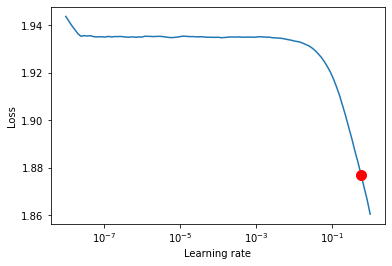

In [20]:
%matplotlib inline
# Results can be found in
lr_finder["lr_find"].results

# Plot with
fig = lr_finder["lr_find"].plot(suggest=True)
fig.show()

In [21]:
# train
model = npClassificator.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name            | Type        | Params
-------------------------------------------------
0  | resnet          | Sequential  | 2.8 M 
1  | dropout_reg     | Dropout     | 0     
2  | fc1_reg         | Linear      | 10.0 M
3  | fc2_reg         | Linear      | 131 K 
4  | batch_norm_reg  | BatchNorm1d | 1.0 K 
5  | fc3_reg         | Linear      | 4.1 K 
6  | dropout_line    | Dropout     | 0     
7  | fc1_line        | Linear      | 10.0 M
8  | fc2_line        | Linear      | 131 K 
9  | batch_norm_line | BatchNorm1d | 1.0 K 
10 | fc3_line        | Linear      | 7


[INFO] best model path /var/www/nomeroff-net24/train/lightning_logs/version_6/checkpoints/epoch=7-step=7999.ckpt


/usr/local/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(


In [25]:
npClassificator.prepare(PATH_TO_REG_CUSTOM_DATASET, verbose=1)

START PREPARING
DATA PREPARED


In [26]:
npClassificator.test()

MisconfigurationException: No `test_dataloader()` method defined to run `Trainer.test`.

In [24]:
npClassificator.save(RESULT_PATH)

model save to /var/www/nomeroff-net24/./data/models/numberplate_options_2022_03_14_pytorch_lightning.ckpt


# classification raport

In [27]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [28]:
print(npClassificator.get_class_region_for_report())
print(npClassificator.class_region)


['military-ru', 'eu-ua-2015', 'eu-ua-2004', 'eu-ua-1995', 'eu', 'xx-transit', 'ru', 'kz', 'eu-ua-ordlo-dpr', 'eu-ua-ordlo-lpr', 'ge', 'by', 'su', 'kg', 'am', 'military-ua']
['military-ru', 'eu-ua-2015', 'eu-ua-2004', 'eu-ua-1995', 'eu', 'xx-transit', 'ru', 'kz', 'eu-ua-ordlo-dpr', 'eu-ua-ordlo-lpr', 'ge', 'by', 'su', 'kg', 'am', 'military-ua']


In [29]:
from NomeroffNet.data_modules.data_loaders import ImgGenerator
from sklearn.metrics import classification_report
import torch

def options_classification_report(npClassificator, 
                                  path_dir, 
                                  mode_torch="gpu"):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    imageGenerator.build_data()
    gen = imageGenerator.path_generator()
    
    out_idx_reg_all = []
    out_idx_line_all = []
    label_idx_reg_all = []
    label_idx_line_all = []
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
            npClassificator.model.cuda()
        with torch.no_grad():
            outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        out_idx_reg_all.extend(out_idx_reg)
        out_idx_line_all.extend(out_idx_line)
        label_idx_reg_all.extend(label_idx_reg)
        label_idx_line_all.extend(label_idx_line)
    
    print("npClassificator.class_region", npClassificator.class_region)
    print("label_idx_reg_all", label_idx_reg_all)
    
    print("\n\nclass region classification report:")
    print(classification_report(label_idx_reg_all, 
                                out_idx_reg_all, 
                                target_names=npClassificator.get_class_region_for_report()))
    print("\n\ncount lines classification report:")
    print(classification_report(label_idx_line_all, 
                                out_idx_line_all, 
                                target_names=npClassificator.count_lines))

In [30]:
options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"))

npClassificator.class_region ['military-ru', 'eu-ua-2015', 'eu-ua-2004', 'eu-ua-1995', 'eu', 'xx-transit', 'ru', 'kz', 'eu-ua-ordlo-dpr', 'eu-ua-ordlo-lpr', 'ge', 'by', 'su', 'kg', 'am', 'military-ua']
label_idx_reg_all [2, 3, 1, 2, 1, 1, 5, 7, 7, 3, 8, 3, 7, 7, 4, 7, 5, 14, 1, 4, 4, 7, 4, 4, 2, 2, 5, 1, 4, 5, 4, 1, 7, 5, 2, 3, 1, 4, 1, 3, 9, 7, 5, 2, 10, 3, 10, 3, 6, 2, 4, 4, 11, 1, 3, 2, 1, 4, 1, 12, 5, 4, 1, 7, 7, 4, 10, 8, 10, 1, 7, 2, 2, 4, 2, 10, 4, 2, 2, 1, 5, 4, 1, 7, 7, 4, 7, 7, 1, 4, 4, 2, 1, 5, 7, 8, 10, 1, 10, 3, 4, 9, 10, 9, 4, 1, 14, 1, 7, 2, 4, 3, 2, 15, 3, 4, 8, 1, 2, 1, 1, 3, 4, 7, 4, 3, 3, 4, 1, 7, 14, 2, 14, 3, 1, 1, 7, 1, 4, 3, 3, 12, 7, 1, 4, 10, 4, 1, 4, 4, 2, 1, 10, 7, 15, 1, 4, 7, 5, 2, 14, 5, 7, 3, 7, 13, 1, 4, 3, 2, 8, 6, 3, 7, 2, 4, 3, 1, 1, 2, 14, 2, 1, 7, 1, 3, 1, 3, 7, 3, 3, 5, 13, 2, 2, 2, 7, 0, 1, 2, 2, 15, 1, 1, 12, 1, 4, 12, 2, 14, 13, 6, 14, 2, 3, 3, 10, 5, 5, 14, 4, 12, 2, 2, 4, 4, 2, 4, 3, 2, 4, 14, 8, 2, 2, 4, 1, 2, 3, 4, 3, 3, 12, 3, 2, 7, 7, 1, 2

# Fine-tuning regions

In [25]:
# npClassificator.train_regions = True
# npClassificator.train_count_lines = False
# npClassificator.epochs = 20

In [26]:
# npClassificator.prepare(PATH_TO_REG_CUSTOM_DATASET, verbose=1, num_workers=24)

START PREPARING
DATA PREPARED


In [27]:
# npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [28]:
# # train
# model = npClassificator.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name            | Type        | Params
-------------------------------------------------
0  | resnet          | Sequential  | 2.8 M 
1  | dropout_reg     | Dropout     | 0     
2  | fc1_reg         | Linear      | 10.0 M
3  | fc2_reg         | Linear      | 131 K 
4  | batch_norm_reg  | BatchNorm1d | 1.0 K 
5  | fc3_reg         | Linear      | 3.9 K 
6  | dropout_line    | Dropout     | 0     
7  | fc1_line        | Linear      | 10.0 M
8  | fc2_line        | Linear      | 131 K 
9  | batch_norm_line | BatchNorm1d | 1.0 K 
10 | fc3_line        | Linear      | 771   
-------------------------------------------------
23.0 M    Trainable params
0         Non-trainable params
23.0 M    Total params
91.904    Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /mnt/store/nomeroff-net/train/lightning_logs/version_106/checkpoints/epoch=19-step=26519.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc_line': 0.9993947148323059,
 'test_acc_reg': 0.9970517158508301,
 'test_accuracy': 0.9982231855392456,
 'test_loss': 1.8222029209136963}
--------------------------------------------------------------------------------


In [29]:
# npClassificator.prepare(PATH_TO_DATASET, verbose=1)
# npClassificator.test()

START PREPARING


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


DATA PREPARED



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc_line': 0.9993947148323059,
 'test_acc_reg': 0.9970517158508301,
 'test_accuracy': 0.9982231855392456,
 'test_loss': 1.8222029209136963}
--------------------------------------------------------------------------------


[{'test_loss': 1.8222029209136963,
  'test_accuracy': 0.9982231855392456,
  'test_acc_reg': 0.9970517158508301,
  'test_acc_line': 0.9993947148323059}]

In [30]:
# npClassificator.save(RESULT_PATH)

model save to /mnt/store/nomeroff-net/./data/models/numberplate_options_2021_11_25_pytorch_lightning.ckpt


In [31]:
# options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"))



class region classification report:
                 precision    recall  f1-score   support

       military       1.00      1.00      1.00       101
     eu-ua-2015       0.99      1.00      1.00       978
     eu-ua-2004       1.00      0.99      0.99       935
     eu-ua-1995       1.00      0.99      0.99       915
             eu       1.00      0.97      0.98       990
     xx-transit       0.99      1.00      1.00       413
             ru       0.97      1.00      0.99       191
             kz       1.00      0.98      0.99       664
eu-ua-ordlo-dpr       0.98      1.00      0.99        44
eu-ua-ordlo-lpr       1.00      0.96      0.98        27
             ge       0.98      1.00      0.99       376
             by       0.73      0.96      0.83        23
             su       0.93      1.00      0.97       273
             kg       0.95      1.00      0.97        95
             am       0.95      1.00      0.97       375

       accuracy                           0.99  

# Fine-tuning regions

In [32]:
# npClassificator.train_regions = False
# npClassificator.train_count_lines = True
# npClassificator.epochs = 20

In [33]:
# npClassificator.prepare(PATH_TO_LINE_CUSTOM_DATASET, verbose=1, num_workers=24)

START PREPARING
DATA PREPARED


In [34]:
# npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [35]:
# # train
# model = npClassificator.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name            | Type        | Params
-------------------------------------------------
0  | resnet          | Sequential  | 2.8 M 
1  | dropout_reg     | Dropout     | 0     
2  | fc1_reg         | Linear      | 10.0 M
3  | fc2_reg         | Linear      | 131 K 
4  | batch_norm_reg  | BatchNorm1d | 1.0 K 
5  | fc3_reg         | Linear      | 3.9 K 
6  | dropout_line    | Dropout     | 0     
7  | fc1_line        | Linear      | 10.0 M
8  | fc2_line        | Linear      | 131 K 
9  | batch_norm_line | BatchNorm1d | 1.0 K 
10 | fc3_line        | Linear      | 771   
-------------------------------------------------
23.0 M    Trainable params
0         Non-trainable params
23.0 M    Total params
91.904    Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /mnt/store/nomeroff-net/train/lightning_logs/version_107/checkpoints/epoch=17-step=23867.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc_line': 0.9993947148323059,
 'test_acc_reg': 0.9967393279075623,
 'test_accuracy': 0.9980670213699341,
 'test_loss': 0.5517926812171936}
--------------------------------------------------------------------------------


In [36]:
# npClassificator.prepare(PATH_TO_DATASET, verbose=1)
# npClassificator.test()

START PREPARING


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


DATA PREPARED



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc_line': 0.9993947148323059,
 'test_acc_reg': 0.9967393279075623,
 'test_accuracy': 0.9980670213699341,
 'test_loss': 0.5517926812171936}
--------------------------------------------------------------------------------


[{'test_loss': 0.5517926812171936,
  'test_accuracy': 0.9980670213699341,
  'test_acc_reg': 0.9967393279075623,
  'test_acc_line': 0.9993947148323059}]

In [37]:
# npClassificator.save(RESULT_PATH)

model save to /mnt/store/nomeroff-net/./data/models/numberplate_options_2021_11_25_pytorch_lightning.ckpt


In [38]:
# options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_LINE_CUSTOM_DATASET, "test"))



class region classification report:
                 precision    recall  f1-score   support

       military       0.99      1.00      1.00       101
     eu-ua-2015       0.99      1.00      1.00       979
     eu-ua-2004       1.00      0.99      1.00       934
     eu-ua-1995       1.00      0.99      0.99       916
             eu       1.00      0.97      0.98       990
     xx-transit       1.00      1.00      1.00       413
             ru       0.96      1.00      0.98       191
             kz       1.00      0.98      0.99       664
eu-ua-ordlo-dpr       0.98      1.00      0.99        44
eu-ua-ordlo-lpr       1.00      0.96      0.98        27
             ge       0.97      1.00      0.99       376
             by       0.81      0.96      0.88        23
             su       0.96      1.00      0.98       273
             kg       0.94      1.00      0.97        95
             am       0.95      1.00      0.98       374

       accuracy                           0.99  

# Check small accuracy images

In [40]:
class MyNpClassificator(OptionsDetector):
    def __init__(self):
        OptionsDetector.__init__(self)
        
        # outputs 2
        #self.class_region = class_region_custom
        self.class_region = ["military",
            "eu-ua-2015",
            "eu-ua-2004",
            "eu-ua-1995",
            "eu",
            "xx-transit",
            "ru",
            "kz",
            "eu-ua-ordlo-dpr",
            "eu-ua-ordlo-lpr",
            "ge",
            "by",
            "su",
            "kg",
            "am"
        ]
        
        # output 3
        self.count_lines = class_count_lines_custom
        
        self.epochs           = 200
        self.batch_size       = 32
        
        # count gpu for train
        self.gpus = 1
        
        self.height         = 64
        self.width         = 295
npClassificator = MyNpClassificator()
npClassificator.prepare(PATH_TO_LINE_CUSTOM_DATASET, verbose=1, num_workers=24)

START PREPARING
DATA PREPARED


In [41]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [42]:
%matplotlib inline

In [43]:
#npClassificator.class_region = npClassificator.get_class_region_for_report()

In [45]:
from NomeroffNet.data_modules.data_loaders import ImgGenerator
import torch
import json
import cv2
import matplotlib.pyplot as plt

def show_img(img_path):
    img = cv2.imread(img_path)
    img = img[..., ::-1]
    plt.imshow(img)
    plt.show()
    
def mark_for_moderation(p):
    json_filepath = p.replace('/img/','/ann/').replace('.png','.json')
    item_data = json.load(open(json_filepath, 'r'))
    if not item_data['moderation']:
        item_data['moderation'] = { "moderatedBy": "dimabendera" }
    item_data['moderation']["isModerated"] = 0
    with open(json_filepath, "w") as json_file:
        json.dump(item_data, json_file)    

def small_acc(npClassificator, 
              path_dir=os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"), 
              mode_torch="gpu", 
              min_acc=0.75):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    print("start imageGenerator build")
    imageGenerator.build_data()
    print("end imageGenerator build")
    gen = imageGenerator.path_generator()

# (npClassificator, 
#               path_dir=os.path.join(PATH_TO_DATASET, "test"), 
#               mode_torch="gpu", 
#               min_acc=0.75):
#     imageGenerator = ImgGenerator(
#         path_dir,
#         npClassificator.width,
#         npClassificator.height,
#         npClassificator.batch_size,
#         [len(npClassificator.class_region), len(npClassificator.count_lines)])
#     print("start imageGenerator build")
#     imageGenerator.build_data()
#     print("end imageGenerator build")
#     gen = imageGenerator.path_generator()
    cnt = 0
    cnt_all = 0
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
        outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        # check reg
        for o, l, p, tens in zip(out_idx_reg, label_idx_reg, img_paths, outputs[0]):
            cnt_all += 1
            if o != l:
                print("[WRONG REGION PREDICTED] pred {}[{}] -> {}[{}] source: {}".format(o,npClassificator.class_region[o], l, npClassificator.class_region[l], p))
                #mark_for_moderation(p)
                show_img(p)
                cnt += 1
    print("Wrong detection: {} numberplates of {}".format(cnt, cnt_all))
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC REGION PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
        # check line
#         for o, l, p, tens in zip(out_idx_line, label_idx_line, img_paths, outputs[1]):
#             if o != l:
#                 print("[WRONG LINE PREDICTED]  pred", o, l, p)
#                 show_img(p)
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC LINE PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
    

start imageGenerator build
end imageGenerator build
[WRONG REGION PREDICTED] pred 13[kg] -> 2[eu-ua-2004] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/260233679.png


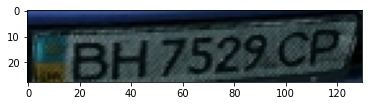

[WRONG REGION PREDICTED] pred 14[am] -> 4[eu] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/260018364.png


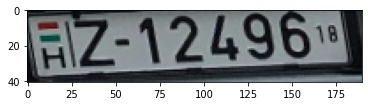

[WRONG REGION PREDICTED] pred 1[eu-ua-2015] -> 2[eu-ua-2004] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/260657748.png


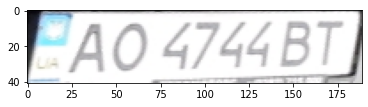

[WRONG REGION PREDICTED] pred 0[military] -> 4[eu] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/260247692.png


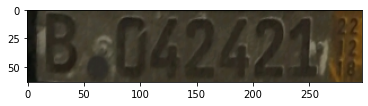

[WRONG REGION PREDICTED] pred 3[eu-ua-1995] -> 4[eu] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/260233308.png


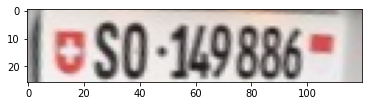

[WRONG REGION PREDICTED] pred 3[eu-ua-1995] -> 14[am] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/260824077.png


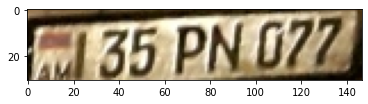

[WRONG REGION PREDICTED] pred 1[eu-ua-2015] -> 4[eu] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/260038674.png


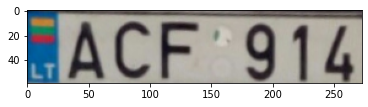

[WRONG REGION PREDICTED] pred 12[su] -> 7[kz] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/90955706-32-full.jpg-0.png


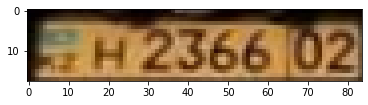

[WRONG REGION PREDICTED] pred 14[am] -> 4[eu] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/260017292.png


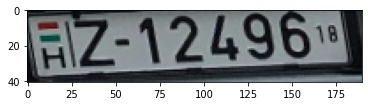

[WRONG REGION PREDICTED] pred 14[am] -> 7[kz] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/12209128.jpg-1.png


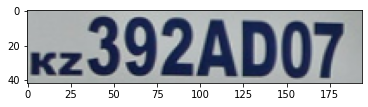

[WRONG REGION PREDICTED] pred 8[eu-ua-ordlo-dpr] -> 9[eu-ua-ordlo-lpr] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/aXU3vrVHZ0joWyObFG7ntTKR9ES2zAelY5i41LIkD6NhPxCJB8.png


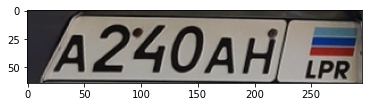

[WRONG REGION PREDICTED] pred 6[ru] -> 7[kz] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/91131873-89-full.jpg-0.png


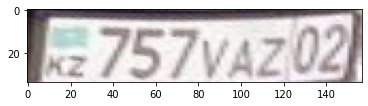

[WRONG REGION PREDICTED] pred 1[eu-ua-2015] -> 4[eu] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/261104172.png


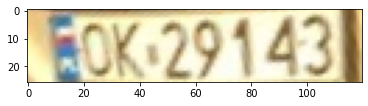

[WRONG REGION PREDICTED] pred 8[eu-ua-ordlo-dpr] -> 9[eu-ua-ordlo-lpr] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/7411-main_0.png


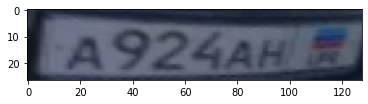

[WRONG REGION PREDICTED] pred 10[ge] -> 4[eu] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/260659854.png


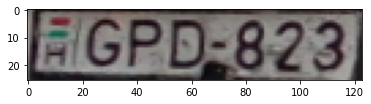

[WRONG REGION PREDICTED] pred 10[ge] -> 4[eu] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/259976481.png


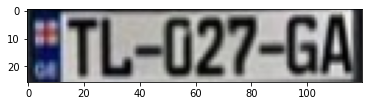

[WRONG REGION PREDICTED] pred 12[su] -> 2[eu-ua-2004] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/option_zero245144080-0.png


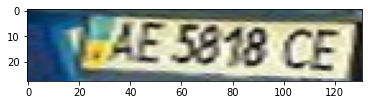

[WRONG REGION PREDICTED] pred 12[su] -> 11[by] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/10299_5KBT1943_0.png


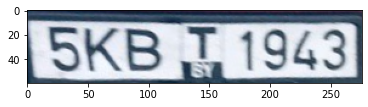

[WRONG REGION PREDICTED] pred 12[su] -> 7[kz] source: /mnt/store/nomeroff-net/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base_reg/test/img/91309424-8-full.jpg-0.png


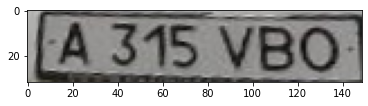

Wrong detection: 19 numberplates of 6400


In [47]:
small_acc(npClassificator, os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"))

In [ ]:
#small_acc(npClassificator, os.path.join(PATH_TO_REG_CUSTOM_DATASET, "train"))

In [ ]:
#small_acc(npClassificator, os.path.join(PATH_TO_REG_CUSTOM_DATASET, "val"))